# Mô tả thuật toán Deep Q-Learning (DQN)
## 1. Giới thiệu
Deep Q-Learning (DQN) là một thuật toán học tăng cường (Reinforcement Learning - RL) kết hợp giữa Q-Learning truyền thống với mạng neural sâu (Deep Neural Network), nhằm giải quyết các bài toán ra quyết định trong không gian trạng thái liên tục hoặc lớn. DQN đã chứng minh hiệu quả vượt trội trong nhiều môi trường phức tạp như trò chơi Atari.




## 2. Lý thuyết và mô hình toán học
2.1. Bối cảnh bài toán
Bài toán học tăng cường được mô hình hóa dưới dạng Markov Decision Process (MDP) với các thành phần:
+ Tập trạng thái: S
+ Tập hành động: A
+ Hàm chuyển trạng thái: P(s'|s,a)
+ Hàm điểm thưởng: r(s,a)
+ Hệ số triết khấu: γ

Mục tiêu của agent là tìm chính sách tối ưu $\pi^*$ sao cho tối đa hóa giá trị kỳ vọng:

$$
J(\pi) = \mathbb{E}_\pi \left[ \sum_{t=0}^\infty \gamma^t r_t \right]
$$


Trong đó:
- $\pi$: chính sách (policy) của agent — ánh xạ từ trạng thái đến xác suất hành động.
- $\gamma \in [0, 1]$: hệ số chiết khấu — kiểm soát mức độ ưu tiên phần thưởng gần so với xa.
- $r_t$: phần thưởng nhận được tại thời điểm $t$.


## Mô tả thuật toán

### 1. Lý thuyết và mô hình toán học

Thuật toán **Deep Q-Network (DQN)** là một phương pháp học tăng cường (Reinforcement Learning) sử dụng mạng nơ-ron sâu để xấp xỉ hàm giá trị hành động \(Q(s, a)\).

- Mục tiêu của thuật toán là tìm được hàm giá trị hành động tối ưu \(Q^*(s, a)\), sao cho chính sách chọn hành động theo quy tắc giúp tối đa hóa tổng phần thưởng kỳ vọng trong tương lai. 

$$
\pi(s) = \arg\max_a Q^*(s, a)
$$

- Công thức cập nhật giá trị \(Q\) theo phương pháp học Q-learning là:
$$
Q_{t+1}(s_t, a_t) = Q_t(s_t, a_t) + \alpha \left[ r_{t+1} + \gamma \max_{a'} Q_t(s_{t+1}, a') - Q_t(s_t, a_t) \right]
$$
trong đó:
- \(s_t\) là trạng thái tại thời điểm \(t\)
- \(a_t\) là hành động được chọn
- \(r_{t+1}\) là phần thưởng nhận được sau khi thực hiện hành động \(a_t\)
- \(\alpha\) là tốc độ học (learning rate)
- \(\gamma \in [0,1]\) là hệ số chiết khấu (discount factor) cho phần thưởng tương lai

- Trong DQN, hàm \(Q(s, a)\) được xấp xỉ bằng một mạng nơ-ron sâu với tham số \(\theta\), và quá trình học tập tối ưu các tham số này dựa trên việc giảm thiểu hàm mất mát:
$$
L(\theta) = \mathbb{E}_{(s,a,r,s') \sim D} \left[ \left( y - Q(s, a; \theta) \right)^2 \right]
$$
với mục tiêu
$$
y = r + \gamma \max_{a'} Q(s', a'; \theta^{-})
$$
trong đó $\theta^{-}$ là tham số của mạng mục tiêu được cập nhật định kỳ để ổn định quá trình học.


## 2. Lý do chọn thuật toán

Thuật toán DQN được chọn vì các lý do sau:

- **Khả năng học chính sách hiệu quả trong không gian trạng thái liên tục và phức tạp:** Mạng nơ-ron sâu giúp mô hình hóa hàm giá trị trong các không gian trạng thái lớn và phức tạp, điều mà các thuật toán truyền thống như Q-learning bảng không thể thực hiện.

- **Ổn định và hiệu quả:** Việc sử dụng mạng mục tiêu và bộ nhớ replay giúp giảm sự phụ thuộc dữ liệu và tăng sự ổn định trong quá trình học.

- **Phù hợp với bài toán có yếu tố cân bằng và vị trí:** Thuật toán cho phép xây dựng hàm phần thưởng tùy chỉnh (reward shaping) để khuyến khích agent duy trì trạng thái mong muốn, ví dụ như đứng ở vị trí trung tâm và giảm tốc độ ngang.

- **Ứng dụng rộng rãi và đã được chứng minh hiệu quả:** DQN là thuật toán tiêu chuẩn trong học tăng cường, có nhiều nghiên cứu và tài liệu tham khảo hỗ trợ, giúp việc triển khai và hiệu chỉnh dễ dàng hơn.

# Version 1

## 1. Thư viện sử dụng

Trong quá trình triển khai mô hình DQN, các thư viện sau được sử dụng:

- `gymnasium`:  
  Thư viện môi trường mô phỏng chuẩn cho học tăng cường (thay thế `gym`). Cung cấp các môi trường như CartPole, LunarLander, giúp kiểm thử và đánh giá các thuật toán RL.

- `random`:  
  Hỗ trợ các thao tác ngẫu nhiên như chọn hành động theo chính sách ε-greedy.

- `torch`, `torch.nn`, `torch.optim`, `torch.nn.functional`:  
  Các module của PyTorch – thư viện học sâu mạnh mẽ để xây dựng, huấn luyện và tối ưu mạng nơ-ron:
  - `torch.nn`: Định nghĩa cấu trúc mạng nơ-ron.
  - `torch.optim`: Cung cấp các thuật toán tối ưu (như Adam, SGD).
  - `torch.nn.functional`: Chứa các hàm như activation, loss, v.v.
  - `torch`: Thao tác tensor và hỗ trợ GPU.

- `numpy`:  
  Thư viện toán học phổ biến, dùng để xử lý các mảng dữ liệu và các phép toán vector hóa hiệu quả.

- `collections.deque`, `namedtuple`:  
  Cấu trúc dữ liệu hỗ trợ cho việc quản lý bộ nhớ kinh nghiệm:
  - `deque`: Hàng đợi hai đầu có giới hạn độ dài, dùng cho bộ nhớ replay.
  - `namedtuple`: Tạo các kiểu dữ liệu tuple có tên trường rõ ràng (ví dụ: lưu trữ transition gồm state, action, reward, next_state, done).

- `matplotlib.pyplot`:  
  Dùng để trực quan hóa kết quả huấn luyện như biểu đồ phần thưởng theo thời gian.


In [ ]:
import gymnasium as gym # Sử dụng gymnasium thay vì gym
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
from collections import deque, namedtuple
import matplotlib.pyplot as plt

## Siêu tham số cơ bản của DQN

+ BUFFER_SIZE: Kích thước của replay buffer – nơi lưu trữ các kinh nghiệm(state, action, reward, next_state, done) để mô hình học từ quá khứ.

+ BATCH_SIZE: Kích thước của mỗi mini-batch được lấy ngẫu nhiên từ buffer để huấn luyện mô hình.

+ GAMMA: Hệ số chiết khấu phần thưởng, giúp cân bằng giữa phần thưởng ngắn hạn và dài hạn.

+ TAU: Tham số cho soft update: xác định mức độ cập nhật dần dần từ online network sang target network.

+ LR: Tốc độ học – xác định mức độ điều chỉnh trọng số sau mỗi bước lan truyền ngược.

+ UPDATE_EVERY: Tần suất (số bước) thực hiện cập nhật trọng số của mạng chính.

+ TARGET_UPDATE_EVERY: Tần suất cập nhật mạng mục tiêu nếu sử dụng phương pháp hard update (ít dùng hơn soft update).

In [ ]:
# Kiểm tra GPU nếu có
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- Hyperparameters ---
BUFFER_SIZE = int(1e5)  # Kích thước replay buffer
BATCH_SIZE = 64         # Kích thước mini-batch
GAMMA = 0.99            # Hệ số chiết khấu
TAU = 1e-3              # Tham số cho soft update target network
LR = 5e-4               # Tốc độ học (learning rate)
UPDATE_EVERY = 4        # Tần suất cập nhật network
TARGET_UPDATE_EVERY = 10 # Tần suất cập nhật target network (nếu dùng hard update, thường dùng soft update)

## Mạng Neural để ước lượng Action-Value Function.
+ state_size (int): Kích thước của mỗi state
+ action_size (int): Kích thước của mỗi action
+ seed (int): Random seed
+ fc1_units (int): Số node ở lớp ẩn thứ nhất
+ fc2_units (int): Số node ở lớp ẩn thứ hai

In [ ]:
# --- QNetwork ---
class QNetwork(nn.Module):

    def __init__(self, state_size, action_size, seed, fc1_units=64, fc2_units=64):
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)

    def forward(self, state):
        """Xây dựng mạng neural ánh xạ state -> action values."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

## Fixed-size buffer để lưu trữ các experience tuples
+ action_size (int): Kích thước của mỗi action
+ buffer_size (int): Kích thước tối đa của buffer
+ batch_size (int): Kích thước của mỗi training batch
+ seed (int): Random seed

In [ ]:
# --- Replay Buffer ---
class ReplayBuffer:

    def __init__(self, action_size, buffer_size, batch_size, seed):
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
        np.random.seed(seed)


    def add(self, state, action, reward, next_state, done):
        """Thêm một experience mới vào memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def sample(self):
        """Lấy ngẫu nhiên một batch experiences từ memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Trả về kích thước hiện tại của memory."""
        return len(self.memory)

## 4. Định nghĩa DQN Agent

Lớp `Agent` đại diện cho tác nhân thông minh trong môi trường học tăng cường. Tác nhân này sẽ tương tác với môi trường, lưu trữ kinh nghiệm, và học chính sách hành động tối ưu thông qua mạng nơ-ron.

### Hàm khởi tạo `__init__`

- Khởi tạo các thuộc tính cơ bản như kích thước trạng thái (`state_size`), số lượng hành động (`action_size`) và seed ngẫu nhiên.
- Tạo hai mạng Q:
  - `qnetwork_local`: Dùng để chọn hành động.
  - `qnetwork_target`: Dùng để tính Q-value mục tiêu (target) trong quá trình huấn luyện.
- Tạo bộ tối ưu hóa Adam cho `qnetwork_local`.
- Thiết lập bộ nhớ kinh nghiệm (`ReplayBuffer`) để lưu trữ và lấy mẫu kinh nghiệm.
- Khởi tạo biến đếm thời gian `t_step` để kiểm soát tần suất cập nhật mô hình.

### Hàm `step`

- Lưu một bước tương tác (experience) vào replay buffer.
- Sau mỗi `UPDATE_EVERY` bước, nếu bộ nhớ đủ dữ liệu thì lấy mẫu và gọi hàm `learn()` để cập nhật mô hình.

### Hàm `act`

- Nhận trạng thái hiện tại và trả về hành động theo chính sách ε-greedy:
  - Với xác suất `1 - ε`: chọn hành động có Q-value cao nhất từ `qnetwork_local`.
  - Với xác suất `ε`: chọn hành động ngẫu nhiên.
- Dùng chế độ `eval()` để tránh tính toán gradient khi dự đoán.

### Hàm `learn`

- Nhận vào một batch kinh nghiệm `(states, actions, rewards, next_states, dones)`.
- Tính toán:
  - `Q_targets_next`: Q-value tối đa từ `qnetwork_target` cho trạng thái tiếp theo.
  - `Q_targets`: Giá trị mục tiêu theo công thức Bellman.
  - `Q_expected`: Q-value hiện tại từ `qnetwork_local`.
- Tính loss (Mean Squared Error) và cập nhật trọng số của `qnetwork_local`.
- Gọi `soft_update` để cập nhật `qnetwork_target` dần dần, giúp mô hình ổn định hơn.

### Hàm `soft_update`

- Cập nhật các trọng số của mạng mục tiêu theo công thức nội suy:
  
  $$
  \theta_{\text{target}} = \tau \cdot \theta_{\text{local}} + (1 - \tau) \cdot \theta_{\text{target}}
  $$

  
- Giúp target network tiến gần mạng chính từ từ, tránh thay đổi đột ngột gây mất ổn định trong quá trình học.

> 💡 **Tổng kết**: Lớp `Agent` là thành phần trung tâm của mô hình DQN, chịu trách nhiệm tương tác với môi trường, lưu trữ kinh nghiệm và cập nhật chính sách hành động thông qua việc huấn luyện mạng nơ-ron.


In [1]:

# --- DQN Agent ---
class Agent():

    def __init__(self, state_size, action_size, seed):
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        torch.manual_seed(seed)
        np.random.seed(seed)


        # Q-Network
        self.qnetwork_local = QNetwork(state_size, action_size, seed).to(device)
        self.qnetwork_target = QNetwork(state_size, action_size, seed).to(device)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=LR)

        # Sao chép trọng số từ local sang target ban đầu
        self.qnetwork_target.load_state_dict(self.qnetwork_local.state_dict())
        for param in self.qnetwork_target.parameters(): # Target network không cần gradient
            param.requires_grad = False


        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        # Khởi tạo time step (cho việc cập nhật mỗi UPDATE_EVERY steps)
        self.t_step = 0

    def step(self, state, action, reward, next_state, done):
        # Lưu experience vào replay memory
        self.memory.add(state, action, reward, next_state, done)

        # Học mỗi UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # Nếu đủ samples trong memory, lấy random subset và học
            if len(self.memory) > BATCH_SIZE:
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, state, eps=0.):
        """Trả về actions cho state hiện tại theo policy hiện tại.
        Params
        ======
            state (array_like): state hiện tại
            eps (float): epsilon, cho epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.qnetwork_local.eval() # Chuyển sang chế độ đánh giá
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
        self.qnetwork_local.train() # Chuyển lại chế độ huấn luyện

        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))

    def learn(self, experiences, gamma):
        """Cập nhật value parameters sử dụng batch experiences đã cho.
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple của (s, a, r, s', done) tuples
            gamma (float): hệ số chiết khấu
        """
        states, actions, rewards, next_states, dones = experiences

        # Lấy max predicted Q-values (cho next states) từ target model
        # .detach() để ngăn gradient lan truyền vào target network
        Q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)

        # Tính Q targets cho current states
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        # Lấy expected Q values từ local model
        # .gather(1, actions) chọn Q-value tương ứng với action đã thực hiện
        Q_expected = self.qnetwork_local(states).gather(1, actions)

        # Tính loss
        loss = F.mse_loss(Q_expected, Q_targets)
        # Tối thiểu hóa loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- #
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model (PyTorch model): weights sẽ được sao chép từ
            target_model (PyTorch model): weights sẽ được sao chép tới
            tau (float): tham số nội suy
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

Using device: cuda


## 5. Hàm Huấn Luyện DQN

Hàm `train_dqn()` thực hiện quá trình huấn luyện agent bằng thuật toán Deep Q-Learning.

### Tham số đầu vào

| Tham số            | Mặc định     | Mô tả |
|--------------------|--------------|------|
| `env`              | –            | Môi trường tương tác (tuân theo giao diện Gymnasium). |
| `agent`            | –            | Đối tượng agent đã được định nghĩa từ trước. |
| `n_episodes`       | `2000`       | Số episode tối đa để huấn luyện. |
| `max_t`            | `1000`       | Số bước (timesteps) tối đa trong mỗi episode. |
| `eps_start`        | `1.0`        | Giá trị epsilon ban đầu cho chính sách ε-greedy. |
| `eps_end`          | `0.01`       | Giá trị epsilon nhỏ nhất. |
| `eps_decay`        | `0.995`      | Hệ số giảm epsilon sau mỗi episode. |
| `solved_score`     | `200.0`      | Ngưỡng điểm trung bình (trong 100 episode gần nhất) để coi là đã "giải" môi trường. |

### Quy trình huấn luyện

1. **Khởi tạo**:
   - `scores`: danh sách chứa điểm số từng episode.
   - `scores_window`: deque để tính điểm trung bình trên 100 episode gần nhất.
   - `eps`: epsilon hiện tại dùng cho chính sách ε-greedy.
   - `best_avg_score`: điểm trung bình tốt nhất đạt được để lưu mô hình.

2. **Vòng lặp qua mỗi episode**:
   - Reset lại môi trường và khởi tạo biến `score`.
   - Mỗi bước thời gian:
     - Agent chọn hành động theo chính sách ε-greedy.
     - Môi trường trả về trạng thái mới, phần thưởng và cờ `done/truncated`.
     - Agent lưu trải nghiệm và học nếu đến lượt cập nhật.
     - Nếu episode kết thúc (do `done` hoặc `truncated`), thoát khỏi vòng lặp.
   - Cập nhật danh sách điểm và epsilon.
   - In ra thông tin sau mỗi 100 episode.

3. **Lưu mô hình tốt nhất**:
   - Nếu điểm trung bình tốt hơn `best_avg_score`, mô hình sẽ được lưu với tên `checkpoint_best.pth`.

> 🧠 **Lưu ý**: 
> - Việc thêm `truncated` giúp xử lý giới hạn thời gian (`max_t`) của Gymnasium.
> - Hàm `train_dqn()` trả về toàn bộ danh sách `scores` để có thể trực quan hóa sau huấn luyện.


In [ ]:
# --- Hàm huấn luyện ---
def train_dqn(env, agent, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, solved_score=200.0):
    """Deep Q-Learning.
    Params
    ======
        n_episodes (int): số episodes tối đa để huấn luyện
        max_t (int): số timesteps tối đa mỗi episode
        eps_start (float): giá trị epsilon ban đầu
        eps_end (float): giá trị epsilon tối thiểu
        eps_decay (float): hệ số nhân để giảm epsilon (multiplicative)
        solved_score (float): điểm trung bình để coi là đã giải quyết được môi trường
    """
    scores = []                        # list chứa scores từ mỗi episode
    scores_window = deque(maxlen=100)  # scores của 100 episodes cuối
    eps = eps_start                    # khởi tạo epsilon
    best_avg_score = -float('inf')     # Lưu điểm trung bình tốt nhất

    for i_episode in range(1, n_episodes+1):
        # Sử dụng `seed` nếu môi trường hỗ trợ để có thể tái tạo kết quả
        # state, info = env.reset(seed=i_episode) # seed cho môi trường (nếu cần)
        state, info = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, truncated, info = env.step(action) # Gymnasium trả về 5 giá trị
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done or truncated: # Thêm truncated để xử lý giới hạn thời gian
                break
        scores_window.append(score)       # lưu score gần nhất
        scores.append(score)              # lưu tất cả scores
        eps = max(eps_end, eps_decay*eps) # giảm epsilon

        print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}', end="")
        if i_episode % 100 == 0:
            print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}\tEpsilon: {eps:.3f}')
            current_avg_score = np.mean(scores_window)
            if current_avg_score > best_avg_score:
                best_avg_score = current_avg_score
                # Lưu model nếu điểm trung bình tốt hơn
                torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_best.pth')
                print(f"Best average score improved to {best_avg_score:.2f}. Model saved.")
    return scores

## Show video 

In [141]:
import base64
from IPython.display import HTML

def show_video(filename: str) -> HTML:
    """Hiển thị video trong Jupyter Notebook."""
    video_file = open(filename, "rb").read()
    encoded = base64.b64encode(video_file).decode("ascii")
    return HTML(f"""
        <video width="640" height="480" controls>
            <source src="data:video/mp4;base64,{encoded}" type="video/mp4">
        </video>
    """)


State size: 8, Action size: 4
Bắt đầu huấn luyện...
Episode 100	Average Score: -148.01	Epsilon: 0.606
Best average score improved to -148.01. Model saved.
Episode 200	Average Score: -111.06	Epsilon: 0.367
Best average score improved to -111.06. Model saved.
Episode 300	Average Score: -69.12	Epsilon: 0.222
Best average score improved to -69.12. Model saved.
Episode 400	Average Score: -33.35	Epsilon: 0.135
Best average score improved to -33.35. Model saved.
Episode 500	Average Score: 0.38	Epsilon: 0.082
Best average score improved to 0.38. Model saved.
Episode 600	Average Score: 124.24	Epsilon: 0.049
Best average score improved to 124.24. Model saved.
Episode 700	Average Score: 216.72	Epsilon: 0.030
Best average score improved to 216.72. Model saved.
Episode 800	Average Score: 223.49	Epsilon: 0.018
Best average score improved to 223.49. Model saved.
Episode 900	Average Score: 203.12	Epsilon: 0.011
Episode 1000	Average Score: 229.38	Epsilon: 0.010
Best average score improved to 229.38. Mo

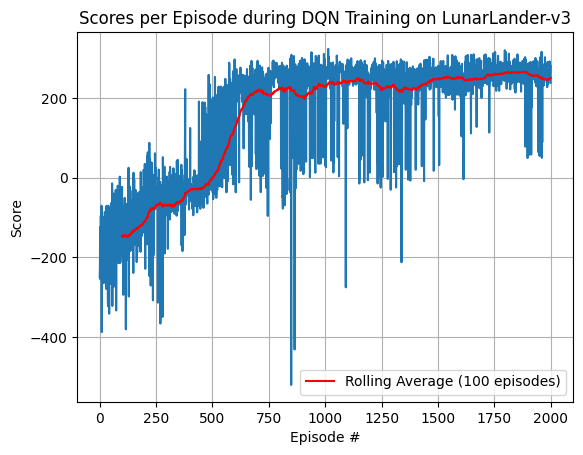

Huấn luyện hoàn tất. Model đã được lưu (checkpoint_best.pth hoặc checkpoint_solved.pth).
Đồ thị điểm số đã được lưu thành 'dqn_lunarlander_scores.png'.


In [28]:
env = gym.make('LunarLander-v3')

    # Lấy thông tin state và action space
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
print(f'State size: {state_size}, Action size: {action_size}')

# Đặt seed cho reproducibility
seed = 42
env.reset(seed=seed) # Seed cho môi trường (nếu có)
# Các seed khác đã được đặt trong Agent và ReplayBuffer

# Khởi tạo Agent
agent = Agent(state_size=state_size, action_size=action_size, seed=seed)

    # Huấn luyện agent
print("Bắt đầu huấn luyện...")
scores = train_dqn(env, agent, n_episodes=2000, eps_decay=0.995, solved_score=200.0)

    # Đóng môi trường
env.close()

    # Vẽ đồ thị scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
    # Tính đường trung bình trượt
rolling_avg = np.convolve(scores, np.ones(100)/100, mode='valid')
plt.plot(np.arange(len(rolling_avg)) + 99, rolling_avg, color='red', label='Rolling Average (100 episodes)')

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Scores per Episode during DQN Training on LunarLander-v3')
plt.legend()
plt.grid(True)
plt.savefig('dqn_lunarlander_scores.png')
plt.show()

print("Huấn luyện hoàn tất. Model đã được lưu (checkpoint_best.pth hoặc checkpoint_solved.pth).")
print("Đồ thị điểm số đã được lưu thành 'dqn_lunarlander_scores.png'.")

In [49]:
import gymnasium as gym
from gym.wrappers import RecordVideo
import torch

# kiểm tra hiệu suất mô hình.
def run_test_agent(model_path,episodes, env_name='LunarLander-v3', video_folder='successful_videos'):
    print(f"\nChạy agent đã huấn luyện từ {model_path}...")

    # Một môi trường thường để test
    env = gym.make(env_name)
    
    # Một môi trường chỉ dùng để ghi video cho 1 episode
    video_env = RecordVideo(gym.make(env_name, render_mode='rgb_array'), 
                            video_folder=video_folder, episode_trigger=lambda episode_id: True)

    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    # Tạo agent và load trọng số
    trained_agent = Agent(state_size=state_size, action_size=action_size, seed=0)
    trained_agent.qnetwork_local.load_state_dict(torch.load(model_path, map_location=device, weights_only=True))
    trained_agent.qnetwork_local.eval()

    success_landing = 0     # số lần đáp đất thành công
    fuel_penalty = 0        # nguyên liệu tiêu thụ
    video_saved = False     # kiểm tra video được lưu hay chưa

    for i in range(episodes):
        if not video_saved:
            curr_env = video_env
        else:
            curr_env = env

        state, _ = curr_env.reset()
        total_reward = 0
        done = False
        truncated = False

        while not (done or truncated):
            action = trained_agent.act(state, eps=0.0)
            next_state, reward, done, truncated, _ = curr_env.step(action)
            total_reward += reward
            state = next_state
            if reward < 0:
                fuel_penalty += abs(reward)

        if total_reward >= 200:
            success_landing += 1
            video_saved = True 

    env.close()
    video_env.close()

    print(f"\nTổng số lần hạ cánh thành công (reward >= 200): {round(success_landing,2)} / {episodes}")
    print(f"Nhiên liệu tiêu hao trung bình: {round(fuel_penalty/episodes,2)} / {episodes}")


In [33]:
run_test_agent(model_path="DQN\checkpoint_best_version_1.pth")


Chạy agent đã huấn luyện từ DQN\checkpoint_best_version_1.pth...
MoviePy - Building video d:\nam2\csttnt\Lunar_Lander\videos\rl-video-episode-0.mp4.
MoviePy - Writing video d:\nam2\csttnt\Lunar_Lander\videos\rl-video-episode-0.mp4



MoviePy - Done !
MoviePy - video ready d:\nam2\csttnt\Lunar_Lander\videos\rl-video-episode-0.mp4

Tổng số lần hạ cánh thành công (reward >= 200): 916 / 1000
Nhiên liệu tiêu hao trung bình: 159.61 / 1000


In [142]:
show_video("successful_videos\DQN\DQN_Version_1.mp4")

# DQN version 2 - Thay đổi các siêu tham số để tăng hiệu suất.

## Các tham số thay đổi:
+ BUFFER_SIZE: tăng tử 1e5 -> 1e6.

## Mong muốn đạt được:
+ Cải thiện hiệu suất hơn khi BUFFER_SIZE lớn hơn.

In [3]:
BUFFER_SIZE = int(1e6)  # Kích thước replay buffer
BATCH_SIZE = 64         # Kích thước mini-batch
GAMMA = 0.99            # Hệ số chiết khấu
TAU = 1e-3              # Tham số cho soft update target network
LR = 5e-4               # Tốc độ học (learning rate)
UPDATE_EVERY = 4        # Tần suất cập nhật network
TARGET_UPDATE_EVERY = 10 # Tần suất cập nhật target network (nếu dùng hard update, thường dùng soft update)

Bắt đầu huấn luyện...
Episode 100	Average Score: -127.47	Epsilon: 0.606
Best average score improved to -127.47. Model saved.
Episode 200	Average Score: -55.39	Epsilon: 0.367
Best average score improved to -55.39. Model saved.
Episode 300	Average Score: 4.75	Epsilon: 0.222
Best average score improved to 4.75. Model saved.
Episode 400	Average Score: 70.69	Epsilon: 0.135
Best average score improved to 70.69. Model saved.
Episode 500	Average Score: 173.07	Epsilon: 0.082
Best average score improved to 173.07. Model saved.
Episode 600	Average Score: 246.95	Epsilon: 0.049
Best average score improved to 246.95. Model saved.
Episode 700	Average Score: 243.94	Epsilon: 0.030
Episode 800	Average Score: 245.09	Epsilon: 0.018
Episode 900	Average Score: 244.49	Epsilon: 0.011
Episode 1000	Average Score: 228.77	Epsilon: 0.010
Episode 1100	Average Score: 245.81	Epsilon: 0.010
Episode 1200	Average Score: 244.25	Epsilon: 0.010
Episode 1300	Average Score: 238.05	Epsilon: 0.010
Episode 1400	Average Score: 2

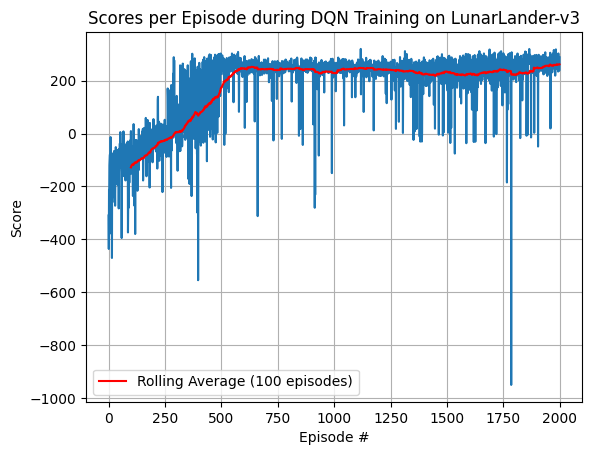

Huấn luyện hoàn tất. Model đã được lưu (checkpoint_best.pth hoặc checkpoint_solved.pth).
Đồ thị điểm số đã được lưu thành 'dqn_lunarlander_scores.png'.


In [ ]:
print("Bắt đầu huấn luyện...")
scores = train_dqn(env, agent, n_episodes=2000, eps_decay=0.995, solved_score=200.0)

    # Đóng môi trường
env.close()

    # Vẽ đồ thị scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
    # Tính đường trung bình trượt
rolling_avg = np.convolve(scores, np.ones(100)/100, mode='valid')
plt.plot(np.arange(len(rolling_avg)) + 99, rolling_avg, color='red', label='Rolling Average (100 episodes)')

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Scores per Episode during DQN Training on LunarLander-v3')
plt.legend()
plt.grid(True)
plt.savefig('dqn_lunarlander_scores.png')
plt.show()

print("Huấn luyện hoàn tất. Model đã được lưu (checkpoint_best.pth hoặc checkpoint_solved.pth).")
print("Đồ thị điểm số đã được lưu thành 'dqn_lunarlander_scores.png'.")

In [34]:
run_test_agent(model_path="DQN\checkpoint_best_version_2.pth")


Chạy agent đã huấn luyện từ DQN\checkpoint_best_version_2.pth...
MoviePy - Building video d:\nam2\csttnt\Lunar_Lander\videos\rl-video-episode-0.mp4.
MoviePy - Writing video d:\nam2\csttnt\Lunar_Lander\videos\rl-video-episode-0.mp4



MoviePy - Done !
MoviePy - video ready d:\nam2\csttnt\Lunar_Lander\videos\rl-video-episode-0.mp4

Tổng số lần hạ cánh thành công (reward >= 200): 948 / 1000
Nhiên liệu tiêu hao trung bình: 117.68 / 1000


In [50]:
import os
import gymnasium as gym
import torch
from moviepy import ImageSequenceClip

# kiểm tra và xuất ra video các trường hợp đỗ thất bại
def run_faild_test_agent(model_path, episodes, env_name='LunarLander-v3', video_folder='failed_videos'):
    print(f"\n🚀 Đang chạy agent từ {model_path}...\n")
    # Tạo thư mục video nếu chưa có
    os.makedirs(video_folder, exist_ok=True)

    # Môi trường bình thường để test
    env = gym.make(env_name)
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    # Load agent
    trained_agent = Agent(state_size=state_size, action_size=action_size, seed=0)
    trained_agent.qnetwork_local.load_state_dict(torch.load(model_path, map_location=device, weights_only=True))
    trained_agent.qnetwork_local.eval()

    success_landing = 0
    fuel_penalty = 0
    fail_count = 0

    for i in range(episodes):
        # Tạo môi trường để render video nếu cần
        temp_env = gym.make(env_name, render_mode='rgb_array')
        state, _ = temp_env.reset()
        total_reward = 0
        done = False
        truncated = False
        frames = []

        while not (done or truncated):
            action = trained_agent.act(state, eps=0.0)
            next_state, reward, done, truncated, _ = temp_env.step(action)
            total_reward += reward
            state = next_state
            fuel_penalty += abs(min(reward, 0))  # chỉ cộng phần tiêu hao

            # Lưu frame
            frame = temp_env.render()
            frames.append(frame)

        if total_reward >= 200:
            success_landing += 1
        else:
            fail_count += 1
            video_path = os.path.join(video_folder, f"failed_episode_{fail_count}.mp4")
            clip = ImageSequenceClip(frames, fps=30)
            clip.write_videofile(video_path, codec="libx264", audio=False)


        temp_env.close()

    env.close()

    print(f"\n📊 Tổng kết sau {episodes} episodes:")
    print(f"✅ Thành công: {success_landing}")
    print(f"❌ Thất bại: {fail_count}")
    print(f"⛽ Nhiên liệu tiêu hao trung bình: {round(fuel_penalty / episodes, 2)}")
    

In [23]:
run_faild_test_agent(model_path="DQN\checkpoint_best_version_2.pth")


🚀 Đang chạy agent từ DQN\checkpoint_best_version_2.pth...

MoviePy - Building video failed_videos\failed_episode_1.mp4.
MoviePy - Writing video failed_videos\failed_episode_1.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_1.mp4
MoviePy - Building video failed_videos\failed_episode_2.mp4.
MoviePy - Writing video failed_videos\failed_episode_2.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_2.mp4
MoviePy - Building video failed_videos\failed_episode_3.mp4.
MoviePy - Writing video failed_videos\failed_episode_3.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_3.mp4
MoviePy - Building video failed_videos\failed_episode_4.mp4.
MoviePy - Writing video failed_videos\failed_episode_4.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_4.mp4
MoviePy - Building video failed_videos\failed_episode_5.mp4.
MoviePy - Writing video failed_videos\failed_episode_5.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_5.mp4
MoviePy - Building video failed_videos\failed_episode_6.mp4.
MoviePy - Writing video failed_videos\failed_episode_6.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_6.mp4

📊 Tổng kết sau 100 episodes:
✅ Thành công: 94
❌ Thất bại: 6
⛽ Nhiên liệu tiêu hao trung bình: 122.91


### Show successful video

In [143]:
show_video("successful_videos\DQN\DQN_Version_2.mp4")

### Show failed video

In [145]:
show_video(r"failed_videos\DQN\DQN_version_2\failed_episode_1.mp4")

# DQN - Version 3 - sửa lỗi khi đáp đất nhưng vẫn còn dùng động cơ.

In [5]:
BUFFER_SIZE = int(1e6)  # Kích thước replay buffer
BATCH_SIZE = 64         # Kích thước mini-batch
GAMMA = 0.99            # Hệ số chiết khấu
TAU = 1e-3              # Tham số cho soft update target network
LR = 5e-4               # Tốc độ học (learning rate)
UPDATE_EVERY = 4        # Tần suất cập nhật network
TARGET_UPDATE_EVERY = 10 # Tần suất cập nhật target network (nếu dùng hard update, thường dùng soft update)

## Lí do:
- Dựa vào quan sát các video về đáp đất thất bại ở Version 2 thì ta có 1 vài nhận xét như sau:
    + Khi đã đáp đất thành công nhưng agent chưa dừng lại mà vẫn còn dùng các động cơ trái và phải để điều chỉnh
    -> Dẫn đến việc làm sai lệch hướng của agent. 
    -> Tệ hơn là làm cho agent vừa ngoài vùng an toàn.
## Giải pháp:
- Xây dựng 1 hàm điểm thưởng thêm(shaped reward):
    + Thưởng điểm thương nếu agent có xu hương đi vào tâm
    + Phạt agent với các độ cao.
    + Thưởng thêm điểm nếu đáp đát thành công
    + Phạt nếu khi đáp bằng cả 2 chân mà còn dùng động cơ ngang.
## Lợi ích mong đợi:
- Tăng khả năng đáp đất thành công agent.
- Agent đáp đất với thời gian nhanh hơn(có thể sẽ tốn nhiên liệu hơn 1 chút).
- Khắc phục được lỗi agent đã đề cập ở Vấn đề.




In [30]:
def shaped_reward(reward, next_state):
    shaped = reward

    x_pos = next_state[0]
    y_pos = next_state[1]
    x_vel = next_state[2]
    y_vel = next_state[3]
    angle = next_state[4]
    left_leg = next_state[6]
    right_leg = next_state[7]

    if not (left_leg and right_leg):
        shaped -= 0.02 * abs(x_pos)
        shaped -= 0.01 * y_pos
        shaped -= 0.01 * abs(angle)

        # Optional bonus nhẹ nếu rất gần giữa
        if abs(x_pos) < 0.1 and abs(angle) < 0.1:
            shaped += 0.05
    else:
        shaped -= 0.03 * abs(x_vel)
        shaped -= 0.01 * abs(y_vel)

    return shaped


In [ ]:
# --- QNetwork ---
class QNetwork(nn.Module):
    """Mạng Neural để ước lượng Action-Value Function."""

    def __init__(self, state_size, action_size, seed, fc1_units=64, fc2_units=64):
        """Khởi tạo tham số và xây dựng model.
        Params
        ======
            state_size (int): Kích thước của mỗi state
            action_size (int): Kích thước của mỗi action
            seed (int): Random seed
            fc1_units (int): Số node ở lớp ẩn thứ nhất
            fc2_units (int): Số node ở lớp ẩn thứ hai
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)

    def forward(self, state):
        """Xây dựng mạng neural ánh xạ state -> action values."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# --- Replay Buffer ---
class ReplayBuffer:
    """Fixed-size buffer để lưu trữ các experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Khởi tạo một ReplayBuffer object.
        Params
        ======
            action_size (int): Kích thước của mỗi action
            buffer_size (int): Kích thước tối đa của buffer
            batch_size (int): Kích thước của mỗi training batch
            seed (int): Random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
        np.random.seed(seed)


    def add(self, state, action, reward, next_state, done):
        """Thêm một experience mới vào memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def sample(self):
        """Lấy ngẫu nhiên một batch experiences từ memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Trả về kích thước hiện tại của memory."""
        return len(self.memory)

# --- DQN Agent ---
class Agent():
    """Agent tương tác và học từ môi trường."""

    def __init__(self, state_size, action_size, seed):
        """Khởi tạo một Agent object.
        Params
        ======
            state_size (int): Kích thước của mỗi state
            action_size (int): Kích thước của mỗi action
            seed (int): Random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        torch.manual_seed(seed)
        np.random.seed(seed)


        # Q-Network
        self.qnetwork_local = QNetwork(state_size, action_size, seed).to(device)
        self.qnetwork_target = QNetwork(state_size, action_size, seed).to(device)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=LR)

        # Sao chép trọng số từ local sang target ban đầu
        self.qnetwork_target.load_state_dict(self.qnetwork_local.state_dict())
        for param in self.qnetwork_target.parameters(): # Target network không cần gradient
            param.requires_grad = False


        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        # Khởi tạo time step (cho việc cập nhật mỗi UPDATE_EVERY steps)
        self.t_step = 0

    def step(self, state, action, reward, next_state, done):
        # Lưu experience vào replay memory
        self.memory.add(state, action, reward, next_state, done)

        # Học mỗi UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # Nếu đủ samples trong memory, lấy random subset và học
            if len(self.memory) > BATCH_SIZE:
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, state, eps=0.):
        """Trả về actions cho state hiện tại theo policy hiện tại.
        Params
        ======
            state (array_like): state hiện tại
            eps (float): epsilon, cho epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.qnetwork_local.eval() # Chuyển sang chế độ đánh giá
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
        self.qnetwork_local.train() # Chuyển lại chế độ huấn luyện

        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))

    def learn(self, experiences, gamma):
        """Cập nhật value parameters sử dụng batch experiences đã cho.
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple của (s, a, r, s', done) tuples
            gamma (float): hệ số chiết khấu
        """
        states, actions, rewards, next_states, dones = experiences

        # Lấy max predicted Q-values (cho next states) từ target model
        # .detach() để ngăn gradient lan truyền vào target network
        Q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)

        # Tính Q targets cho current states
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        # Lấy expected Q values từ local model
        # .gather(1, actions) chọn Q-value tương ứng với action đã thực hiện
        Q_expected = self.qnetwork_local(states).gather(1, actions)

        # Tính loss
        loss = F.mse_loss(Q_expected, Q_targets)
        # Tối thiểu hóa loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- #
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model (PyTorch model): weights sẽ được sao chép từ
            target_model (PyTorch model): weights sẽ được sao chép tới
            tau (float): tham số nội suy
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)


# --- Hàm huấn luyện ---
def train_dqn(env, agent, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, solved_score=200.0):
    """Deep Q-Learning.
    Params
    ======
        n_episodes (int): số episodes tối đa để huấn luyện
        max_t (int): số timesteps tối đa mỗi episode
        eps_start (float): giá trị epsilon ban đầu
        eps_end (float): giá trị epsilon tối thiểu
        eps_decay (float): hệ số nhân để giảm epsilon (multiplicative)
        solved_score (float): điểm trung bình để coi là đã giải quyết được môi trường
    """
    scores = []                        # list chứa scores từ mỗi episode
    scores_window = deque(maxlen=100)  # scores của 100 episodes cuối
    eps = eps_start                    # khởi tạo epsilon
    best_avg_score = -float('inf')     # Lưu điểm trung bình tốt nhất

    for i_episode in range(1, n_episodes+1):
        # Sử dụng `seed` nếu môi trường hỗ trợ để có thể tái tạo kết quả
        # state, info = env.reset(seed=i_episode) # seed cho môi trường (nếu cần)
        state, info = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, truncated, info = env.step(action) # Gymnasium trả về 5 giá trị
            shaped = shaped_reward(reward,next_state)
            agent.step(state, action, shaped, next_state, done)
            state = next_state
            score += reward
            if done or truncated: # Thêm truncated để xử lý giới hạn thời gian
                break
        scores_window.append(score)       # lưu score gần nhất
        scores.append(score)              # lưu tất cả scores
        eps = max(eps_end, eps_decay*eps) # giảm epsilon

        print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}', end="")
        if i_episode % 100 == 0:
            print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}\tEpsilon: {eps:.3f}')
            current_avg_score = np.mean(scores_window)
            if current_avg_score > best_avg_score:
                best_avg_score = current_avg_score
                # Lưu model nếu điểm trung bình tốt hơn
                torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_best.pth')
                print(f"Best average score improved to {best_avg_score:.2f}. Model saved.")
    return scores

State size: 8, Action size: 4
Bắt đầu huấn luyện...
Episode 100	Average Score: -161.56	Epsilon: 0.606
Best average score improved to -161.56. Model saved.
Episode 200	Average Score: -92.75	Epsilon: 0.367
Best average score improved to -92.75. Model saved.
Episode 300	Average Score: -99.39	Epsilon: 0.222
Episode 400	Average Score: -26.96	Epsilon: 0.135
Best average score improved to -26.96. Model saved.
Episode 500	Average Score: 39.81	Epsilon: 0.082
Best average score improved to 39.81. Model saved.
Episode 600	Average Score: 96.05	Epsilon: 0.049
Best average score improved to 96.05. Model saved.
Episode 700	Average Score: 180.96	Epsilon: 0.030
Best average score improved to 180.96. Model saved.
Episode 800	Average Score: 191.71	Epsilon: 0.018
Best average score improved to 191.71. Model saved.
Episode 900	Average Score: 214.69	Epsilon: 0.011
Best average score improved to 214.69. Model saved.
Episode 1000	Average Score: 199.93	Epsilon: 0.010
Episode 1100	Average Score: 195.32	Epsilon:

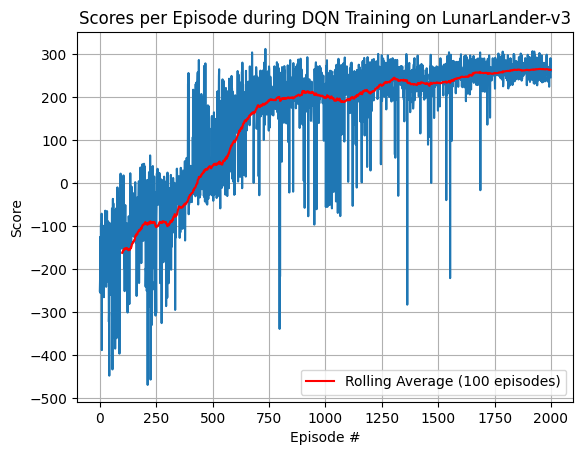

Huấn luyện hoàn tất. Model đã được lưu (checkpoint_best.pth hoặc checkpoint_solved.pth).
Đồ thị điểm số đã được lưu thành 'dqn_lunarlander_scores.png'.


In [36]:
import gymnasium as gym
env = gym.make('LunarLander-v3')

# Lấy thông tin state và action space
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
print(f'State size: {state_size}, Action size: {action_size}')

# Đặt seed cho reproducibility
seed = 42
env.reset(seed=seed) # Seed cho môi trường (nếu có)
# Các seed khác đã được đặt trong Agent và ReplayBuffer

# Khởi tạo Agent
agent = Agent(state_size=state_size, action_size=action_size, seed=seed)
print("Bắt đầu huấn luyện...")
scores = train_dqn(env, agent, n_episodes=2000, eps_decay=0.995, solved_score=200.0)

    # Đóng môi trường
env.close()

    # Vẽ đồ thị scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
    # Tính đường trung bình trượt
rolling_avg = np.convolve(scores, np.ones(100)/100, mode='valid')
plt.plot(np.arange(len(rolling_avg)) + 99, rolling_avg, color='red', label='Rolling Average (100 episodes)')

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Scores per Episode during DQN Training on LunarLander-v3')
plt.legend()
plt.grid(True)
plt.savefig('dqn_lunarlander_scores.png')
plt.show()

print("Huấn luyện hoàn tất. Model đã được lưu (checkpoint_best.pth hoặc checkpoint_solved.pth).")
print("Đồ thị điểm số đã được lưu thành 'dqn_lunarlander_scores.png'.")

In [37]:
run_test_agent(model_path="checkpoint_best.pth")


Chạy agent đã huấn luyện từ checkpoint_best.pth...
MoviePy - Building video d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4.
MoviePy - Writing video d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4



MoviePy - Done !
MoviePy - video ready d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4

Tổng số lần hạ cánh thành công (reward >= 200): 914 / 1000
Nhiên liệu tiêu hao trung bình: 157.67 / 1000


In [41]:
run_faild_test_agent(model_path="checkpoint_best.pth",episodes=100)


🚀 Đang chạy agent từ checkpoint_best.pth...

MoviePy - Building video failed_videos\failed_episode_1.mp4.
MoviePy - Writing video failed_videos\failed_episode_1.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_1.mp4
MoviePy - Building video failed_videos\failed_episode_2.mp4.
MoviePy - Writing video failed_videos\failed_episode_2.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_2.mp4
MoviePy - Building video failed_videos\failed_episode_3.mp4.
MoviePy - Writing video failed_videos\failed_episode_3.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_3.mp4
MoviePy - Building video failed_videos\failed_episode_4.mp4.
MoviePy - Writing video failed_videos\failed_episode_4.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_4.mp4
MoviePy - Building video failed_videos\failed_episode_5.mp4.
MoviePy - Writing video failed_videos\failed_episode_5.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_5.mp4
MoviePy - Building video failed_videos\failed_episode_6.mp4.
MoviePy - Writing video failed_videos\failed_episode_6.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_6.mp4
MoviePy - Building video failed_videos\failed_episode_7.mp4.
MoviePy - Writing video failed_videos\failed_episode_7.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_7.mp4
MoviePy - Building video failed_videos\failed_episode_8.mp4.
MoviePy - Writing video failed_videos\failed_episode_8.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_8.mp4
MoviePy - Building video failed_videos\failed_episode_9.mp4.
MoviePy - Writing video failed_videos\failed_episode_9.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_9.mp4

📊 Tổng kết sau 100 episodes:
✅ Thành công: 91
❌ Thất bại: 9
⛽ Nhiên liệu tiêu hao trung bình: 155.77


[(np.float64(146.67447214881588),
  array([ 5.2802753e-02, -8.8501215e-04, -4.1449545e-03,  8.5632682e-06,
         -8.3767920e-04, -3.8658836e-06,  0.0000000e+00,  0.0000000e+00],
        dtype=float32)),
 (np.float64(157.38872610648733),
  array([ 9.3923375e-02, -7.3008775e-04,  6.4153370e-04, -3.1345487e-06,
          7.3489686e-04, -1.8817878e-04,  0.0000000e+00,  1.0000000e+00],
        dtype=float32)),
 (np.float64(157.40410196447561),
  array([ 5.1050473e-02, -8.8354590e-04, -2.2964072e-03, -3.8559010e-06,
         -1.8689494e-03,  6.6156057e-04,  0.0000000e+00,  0.0000000e+00],
        dtype=float32)),
 (np.float64(165.42297981583334),
  array([ 9.0867713e-02, -1.0776663e-03, -1.3343649e-03,  3.5737512e-06,
         -2.1356314e-03,  3.8139909e-04,  0.0000000e+00,  1.0000000e+00],
        dtype=float32)),
 (np.float64(142.86895230232864),
  array([ 1.4427423e-01, -1.1058416e-02,  2.0944225e-03, -1.5228822e-04,
         -7.3928639e-02, -7.1345503e-04,  1.0000000e+00,  1.0000000e+

### successful video

In [146]:
show_video("successful_videos\DQN\DQN_Version_3.mp4")

### Failed video

In [148]:
show_video(r"failed_videos\DQN\DQN_version_3\failed_episode_1.mp4")

# DQN Verion 4

## Lí do:
    + Khi đáp đất vẫn còn dùng động cơ
    + Mắc kẹt 1 chân bên ngoài với môi trường nghiêngnghiêng

## Giải pháp:
    + Điều chỉnh lại hệ số điểm thưởng trong hàm shaped_reward.
    + thêm điểm thưởng cho agent hương agent vào trung tâm tránh trường hợp bị rơi ra khỏi vùng an toàn.
    + Thêm số lượng eposides.

## Lơi ích mong đơi:
    + Sửa lỗi đáp đất đẹp nhưng vẫn tính là đáp đất lỗi
    + Tránh được các trường hợp môi trường bị nghiêng ở rìa vùng an toàn

In [47]:
import numpy as np # Giả sử bạn dùng numpy cho abs

def shaped_reward(reward, next_state):
    shaped = reward  # Bắt đầu với reward gốc từ môi trường

    x_pos = next_state[0]
    y_pos = next_state[1]
    x_vel = next_state[2]
    y_vel = next_state[3]
    angle = next_state[4]
    angular_vel = next_state[5] # Sử dụng vận tốc góc
    left_leg = next_state[6]    # 0.0 (không chạm) hoặc 1.0 (chạm)
    right_leg = next_state[7]   # 0.0 (không chạm) hoặc 1.0 (chạm)

    # --- Hình phạt/Thưởng khi đang bay hoặc chỉ một chân chạm đất ---
    if not (left_leg and right_leg): # Tức là left_leg == 0 hoặc right_leg == 0
        # Phạt nếu xa tâm theo trục X
        shaped -= 0.02 * abs(x_pos)
        # Phạt nếu ở vị trí Y cao (khuyến khích hạ cánh)
        # Giả sử y_pos luôn > 0 khi bay và gần 0 khi đáp.
        shaped -= 0.01 * y_pos
        # Phạt nếu bị nghiêng
        shaped -= 0.015 * abs(angle) # Tăng nhẹ hình phạt cho góc nghiêng
        # Phạt nếu xoay quá nhanh (khuyến khích ổn định)
        shaped -= 0.005 * abs(angular_vel)

        # Thưởng nhẹ nếu gần giữa và thẳng đứng khi đang hạ cánh (và còn ở trên không)
        if abs(x_pos) < 0.1 and abs(angle) < 0.1 and y_pos > 0.05: # y_pos > 0.05 để chắc chắn còn bay
            shaped += 0.05

    # --- Hình phạt khi cả hai chân đã chạm đất ---
    else: # Tức là left_leg == 1 và right_leg == 1
        # Phạt nếu có vận tốc ngang (khuyến khích đứng yên)
        shaped -= 0.03 * abs(x_vel)
        # Phạt nếu có vận tốc dọc (khuyến khích đứng yên, không nảy)
        shaped -= 0.01 * abs(y_vel)
        # Phạt nếu xoay khi đã đáp (khuyến khích đứng yên hoàn toàn)
        shaped -= 0.01 * abs(angular_vel) # Tăng nhẹ hình phạt xoay khi đáp

        # **CẢI TIẾN QUAN TRỌNG:** Phạt nếu không ở giữa hoặc không thẳng đứng KHI ĐÃ ĐÁP
        # Điều này sẽ ngăn agent cố gắng "lết" về giữa sau khi đáp.
        # Hệ số phạt nhỏ hơn so với khi đang bay.
        shaped -= 0.01 * abs(x_pos)
        shaped -= 0.005 * abs(angle)

        # Thưởng thêm một chút nếu đáp rất tốt (đứng yên, thẳng, giữa)
        # Điều này có thể giúp agent "khóa" vào trạng thái tốt.
        if abs(x_vel) < 0.05 and abs(y_vel) < 0.05 and abs(x_pos) < 0.05 and abs(angle) < 0.05 and abs(angular_vel) < 0.05:
            shaped += 0.1 # Thưởng này cần cân nhắc, có thể làm agent ở lại quá lâu

    # Cân nhắc phạt nhẹ cho việc sử dụng động cơ chính quá nhiều nếu có thể (tùy môi trường)
    # Ví dụ: if action_taken == main_engine_fire: shaped -= 0.001
    # Điều này phức tạp hơn vì cần thông tin về action.

    return shaped

In [48]:
# --- QNetwork ---
class QNetwork(nn.Module):
    """Mạng Neural để ước lượng Action-Value Function."""

    def __init__(self, state_size, action_size, seed, fc1_units=64, fc2_units=64):
        """Khởi tạo tham số và xây dựng model.
        Params
        ======
            state_size (int): Kích thước của mỗi state
            action_size (int): Kích thước của mỗi action
            seed (int): Random seed
            fc1_units (int): Số node ở lớp ẩn thứ nhất
            fc2_units (int): Số node ở lớp ẩn thứ hai
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)

    def forward(self, state):
        """Xây dựng mạng neural ánh xạ state -> action values."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# --- Replay Buffer ---
class ReplayBuffer:
    """Fixed-size buffer để lưu trữ các experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Khởi tạo một ReplayBuffer object.
        Params
        ======
            action_size (int): Kích thước của mỗi action
            buffer_size (int): Kích thước tối đa của buffer
            batch_size (int): Kích thước của mỗi training batch
            seed (int): Random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
        np.random.seed(seed)


    def add(self, state, action, reward, next_state, done):
        """Thêm một experience mới vào memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def sample(self):
        """Lấy ngẫu nhiên một batch experiences từ memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Trả về kích thước hiện tại của memory."""
        return len(self.memory)

# --- DQN Agent ---
class Agent():
    """Agent tương tác và học từ môi trường."""

    def __init__(self, state_size, action_size, seed):
        """Khởi tạo một Agent object.
        Params
        ======
            state_size (int): Kích thước của mỗi state
            action_size (int): Kích thước của mỗi action
            seed (int): Random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        torch.manual_seed(seed)
        np.random.seed(seed)


        # Q-Network
        self.qnetwork_local = QNetwork(state_size, action_size, seed).to(device)
        self.qnetwork_target = QNetwork(state_size, action_size, seed).to(device)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=LR)

        # Sao chép trọng số từ local sang target ban đầu
        self.qnetwork_target.load_state_dict(self.qnetwork_local.state_dict())
        for param in self.qnetwork_target.parameters(): # Target network không cần gradient
            param.requires_grad = False


        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        # Khởi tạo time step (cho việc cập nhật mỗi UPDATE_EVERY steps)
        self.t_step = 0

    def step(self, state, action, reward, next_state, done):
        # Lưu experience vào replay memory
        self.memory.add(state, action, reward, next_state, done)

        # Học mỗi UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # Nếu đủ samples trong memory, lấy random subset và học
            if len(self.memory) > BATCH_SIZE:
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, state, eps=0.):
        """Trả về actions cho state hiện tại theo policy hiện tại.
        Params
        ======
            state (array_like): state hiện tại
            eps (float): epsilon, cho epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.qnetwork_local.eval() # Chuyển sang chế độ đánh giá
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
        self.qnetwork_local.train() # Chuyển lại chế độ huấn luyện

        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))

    def learn(self, experiences, gamma):
        """Cập nhật value parameters sử dụng batch experiences đã cho.
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple của (s, a, r, s', done) tuples
            gamma (float): hệ số chiết khấu
        """
        states, actions, rewards, next_states, dones = experiences

        # Lấy max predicted Q-values (cho next states) từ target model
        # .detach() để ngăn gradient lan truyền vào target network
        Q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)

        # Tính Q targets cho current states
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        # Lấy expected Q values từ local model
        # .gather(1, actions) chọn Q-value tương ứng với action đã thực hiện
        Q_expected = self.qnetwork_local(states).gather(1, actions)

        # Tính loss
        loss = F.mse_loss(Q_expected, Q_targets)
        # Tối thiểu hóa loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- #
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model (PyTorch model): weights sẽ được sao chép từ
            target_model (PyTorch model): weights sẽ được sao chép tới
            tau (float): tham số nội suy
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)


# --- Hàm huấn luyện ---
def train_dqn(env, agent, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, solved_score=200.0):
    """Deep Q-Learning.
    Params
    ======
        n_episodes (int): số episodes tối đa để huấn luyện
        max_t (int): số timesteps tối đa mỗi episode
        eps_start (float): giá trị epsilon ban đầu
        eps_end (float): giá trị epsilon tối thiểu
        eps_decay (float): hệ số nhân để giảm epsilon (multiplicative)
        solved_score (float): điểm trung bình để coi là đã giải quyết được môi trường
    """
    scores = []                        # list chứa scores từ mỗi episode
    scores_window = deque(maxlen=100)  # scores của 100 episodes cuối
    eps = eps_start                    # khởi tạo epsilon
    best_avg_score = -float('inf')     # Lưu điểm trung bình tốt nhất

    for i_episode in range(1, n_episodes+1):
        # Sử dụng `seed` nếu môi trường hỗ trợ để có thể tái tạo kết quả
        # state, info = env.reset(seed=i_episode) # seed cho môi trường (nếu cần)
        state, info = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, truncated, info = env.step(action) # Gymnasium trả về 5 giá trị
            shaped = shaped_reward(reward,next_state)
            agent.step(state, action, shaped, next_state, done)
            state = next_state
            score += reward
            if done or truncated: # Thêm truncated để xử lý giới hạn thời gian
                break
        scores_window.append(score)       # lưu score gần nhất
        scores.append(score)              # lưu tất cả scores
        eps = max(eps_end, eps_decay*eps) # giảm epsilon

        print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}', end="")
        if i_episode % 100 == 0:
            print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}\tEpsilon: {eps:.3f}')
            current_avg_score = np.mean(scores_window)
            if current_avg_score > best_avg_score:
                best_avg_score = current_avg_score
                # Lưu model nếu điểm trung bình tốt hơn
                torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_best.pth')
                print(f"Best average score improved to {best_avg_score:.2f}. Model saved.")
    return scores

State size: 8, Action size: 4
Bắt đầu huấn luyện...
Episode 100	Average Score: -161.51	Epsilon: 0.606
Best average score improved to -161.51. Model saved.
Episode 200	Average Score: -117.55	Epsilon: 0.367
Best average score improved to -117.55. Model saved.
Episode 300	Average Score: -62.26	Epsilon: 0.222
Best average score improved to -62.26. Model saved.
Episode 400	Average Score: 36.52	Epsilon: 0.135
Best average score improved to 36.52. Model saved.
Episode 500	Average Score: 139.35	Epsilon: 0.082
Best average score improved to 139.35. Model saved.
Episode 600	Average Score: 189.96	Epsilon: 0.049
Best average score improved to 189.96. Model saved.
Episode 700	Average Score: 193.69	Epsilon: 0.030
Best average score improved to 193.69. Model saved.
Episode 800	Average Score: 221.94	Epsilon: 0.018
Best average score improved to 221.94. Model saved.
Episode 900	Average Score: 233.00	Epsilon: 0.011
Best average score improved to 233.00. Model saved.
Episode 1000	Average Score: 224.58	Ep

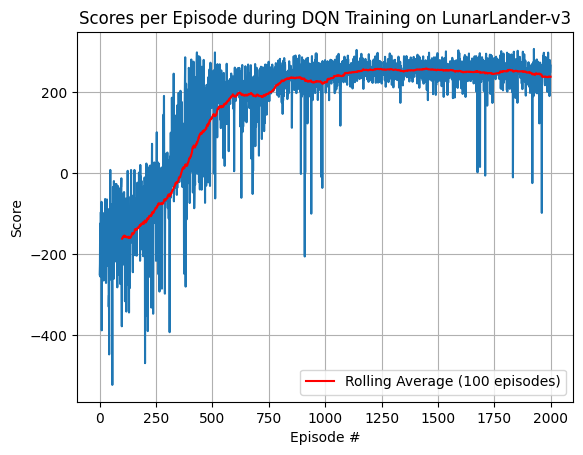

Huấn luyện hoàn tất. Model đã được lưu (checkpoint_best.pth hoặc checkpoint_solved.pth).
Đồ thị điểm số đã được lưu thành 'dqn_lunarlander_scores.png'.


In [49]:
import gymnasium as gym
env = gym.make('LunarLander-v3')

# Lấy thông tin state và action space
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
print(f'State size: {state_size}, Action size: {action_size}')

# Đặt seed cho reproducibility
seed = 42
env.reset(seed=seed) # Seed cho môi trường (nếu có)
# Các seed khác đã được đặt trong Agent và ReplayBuffer

# Khởi tạo Agent
agent = Agent(state_size=state_size, action_size=action_size, seed=seed)
print("Bắt đầu huấn luyện...")
scores = train_dqn(env, agent, n_episodes=2000, eps_decay=0.995, solved_score=200.0)

    # Đóng môi trường
env.close()

    # Vẽ đồ thị scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
    # Tính đường trung bình trượt
rolling_avg = np.convolve(scores, np.ones(100)/100, mode='valid')
plt.plot(np.arange(len(rolling_avg)) + 99, rolling_avg, color='red', label='Rolling Average (100 episodes)')

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Scores per Episode during DQN Training on LunarLander-v3')
plt.legend()
plt.grid(True)
plt.savefig('dqn_lunarlander_scores.png')
plt.show()

print("Huấn luyện hoàn tất. Model đã được lưu (checkpoint_best.pth hoặc checkpoint_solved.pth).")
print("Đồ thị điểm số đã được lưu thành 'dqn_lunarlander_scores.png'.")

In [52]:
run_test_agent(model_path="checkpoint_best.pth")


Chạy agent đã huấn luyện từ checkpoint_best.pth...
MoviePy - Building video d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4.
MoviePy - Writing video d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4



MoviePy - Done !
MoviePy - video ready d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4

Tổng số lần hạ cánh thành công (reward >= 200): 995 / 1000
Nhiên liệu tiêu hao trung bình: 204.54 / 1000


In [60]:
run_faild_test_agent(model_path="checkpoint_best.pth", episodes = 1000)


🚀 Đang chạy agent từ checkpoint_best.pth...

MoviePy - Building video failed_videos\failed_episode_1.mp4.
MoviePy - Writing video failed_videos\failed_episode_1.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_1.mp4
MoviePy - Building video failed_videos\failed_episode_2.mp4.
MoviePy - Writing video failed_videos\failed_episode_2.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_2.mp4
MoviePy - Building video failed_videos\failed_episode_3.mp4.
MoviePy - Writing video failed_videos\failed_episode_3.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_3.mp4
MoviePy - Building video failed_videos\failed_episode_4.mp4.
MoviePy - Writing video failed_videos\failed_episode_4.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_4.mp4
MoviePy - Building video failed_videos\failed_episode_5.mp4.
MoviePy - Writing video failed_videos\failed_episode_5.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_5.mp4
MoviePy - Building video failed_videos\failed_episode_6.mp4.
MoviePy - Writing video failed_videos\failed_episode_6.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_6.mp4
MoviePy - Building video failed_videos\failed_episode_7.mp4.
MoviePy - Writing video failed_videos\failed_episode_7.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_7.mp4

📊 Tổng kết sau 1000 episodes:
✅ Thành công: 993
❌ Thất bại: 7
⛽ Nhiên liệu tiêu hao trung bình: 205.68


### Successful video

In [149]:
show_video(r"successful_videos\DQN\DQN_Version_4.mp4")

### Failed video

In [150]:
show_video(r"failed_videos\DQN\DQN_version_4\failed_episode_1.mp4")

# DQN - Version 5

## Lí do:
    + Vẫn bị thiếu sót trường hợp với môi trường bị nghiêng quá lớn ở 2 mép biên cờ. Khiến động cơ của agen ko đủ mạnh để có thể đưa agent ra khỏi đó.

## Giải pháp:
    + Tiếp tục điều chỉnh shaped reward với hệ số phạt cao hơn để ưư tiên agent vào phần trung tâm tránh cho việc agent đáp ngoài rìa.

## Lợi ích mong đợi:
    + Sửa được agent với lỗi nhỏ giúp hiệu suất đạt cao nhất có thể với DQN.

In [17]:
import numpy as np

def shaped_reward(reward, next_state):
    shaped = reward  # Bắt đầu với reward gốc từ môi trường

    x_pos = next_state[0]
    y_pos = next_state[1]
    x_vel = next_state[2]
    y_vel = next_state[3]
    angle = next_state[4]
    angular_vel = next_state[5]
    left_leg = next_state[6]
    right_leg = next_state[7]

    # --- Trường hợp 1: Cả hai chân đều KHÔNG chạm đất (ĐANG BAY) ---
    if not left_leg and not right_leg:
        # Phạt nếu xa tâm theo trục X
        shaped -= 0.02 * abs(x_pos)
        # Phạt nếu ở vị trí Y cao (khuyến khích hạ cánh)
        shaped -= 0.01 * y_pos
        # Phạt nếu bị nghiêng
        shaped -= 0.015 * abs(angle)
        # Phạt nếu xoay quá nhanh
        shaped -= 0.005 * abs(angular_vel)

        # Thưởng nhẹ nếu gần giữa và thẳng đứng khi đang hạ cánh (và còn ở trên không)
        if abs(x_pos) < 0.1 and abs(angle) < 0.1 and y_pos > 0.05:
            shaped += 0.05

    # --- Trường hợp 2: CHỈ MỘT chân chạm đất (TRẠNG THÁI NGUY HIỂM - CẦN XỬ LÝ ĐẶC BIỆT) ---
    elif left_leg != right_leg: # Tức là (left_leg == 1 and right_leg == 0) hoặc ngược lại
        # **ƯU TIÊN HÀNG ĐẦU: NGĂN TRƯỢT NGANG**
        # Phạt rất nặng cho vận tốc ngang nếu một chân đã chạm
        shaped -= 0.3 * abs(x_vel) # Giữ hình phạt này rất cao, hoặc thậm chí tăng lên

        # **GIỮ THĂNG BẰNG:**
        # Phạt nặng cho góc nghiêng, vì nó sẽ sớm dẫn đến x_vel hoặc lật
        shaped -= 0.2 * abs(angle) # Tăng mạnh so với khi đang bay
        # Phạt nặng cho vận tốc góc
        shaped -= 0.15 * abs(angular_vel) # Tăng mạnh so với khi đang bay

        # **VỊ TRÍ Xấu KHI 1 CHÂN CHẠM:**
        # Phạt nếu chân chạm đất ở vị trí xa cờ (x_pos lớn)
        # Điều này trực tiếp giải quyết vấn đề "đỗ 1 chân bên ngoài cờ"
        if abs(x_pos) > 0.15: # Ngưỡng này có thể cần điều chỉnh (ví dụ: > 0.1 hoặc > 0.2)
            shaped -= 0.1 * abs(x_pos) # Hình phạt đáng kể cho việc ở xa tâm khi 1 chân chạm

        # Phạt nếu cố gắng nảy lên hoặc bay lên lại bằng một chân
        if y_vel > 0.01:
            shaped -= 0.15 * y_vel # Phạt mạnh việc tăng y_vel

        # Phạt nếu thân tàu còn ở trên cao (khuyến khích hạ nốt chân kia xuống)
        # Chỉ phạt nếu y_pos còn đáng kể, tránh phạt khi vừa chạm nhẹ
        if y_pos > 0.05:
            shaped -= 0.05 * y_pos

        # Thưởng rất nhỏ nếu giữ được ổn định TẠM THỜI trong trạng thái này
        # và đang cố gắng hạ xuống (y_vel <= 0)
        if abs(x_vel) < 0.05 and abs(angle) < 0.1 and abs(angular_vel) < 0.1 and y_vel <= 0:
            shaped += 0.02 # Thưởng nhỏ cho nỗ lực giữ thăng bằng thụ động và hạ xuống

    # --- Trường hợp 3: Cả hai chân ĐÃ chạm đất (ĐÁP THÀNH CÔNG) ---
    else: # Tức là left_leg == 1 và right_leg == 1
        # Phần này giữ nguyên từ mã của bạn, vì bạn nói nó hoạt động tốt
        shaped -= 0.03 * abs(x_vel)
        shaped -= 0.01 * abs(y_vel)
        shaped -= 0.01 * abs(angular_vel)
        shaped -= 0.01 * abs(x_pos) # Phạt nếu không ở giữa khi đã đáp
        shaped -= 0.005 * abs(angle) # Phạt nếu không thẳng đứng khi đã đáp

        if abs(x_vel) < 0.05 and abs(y_vel) < 0.05 and abs(x_pos) < 0.05 and abs(angle) < 0.05 and abs(angular_vel) < 0.05:
            shaped += 0.1

    return shaped

In [19]:
# --- QNetwork ---
class QNetwork(nn.Module):
    """Mạng Neural để ước lượng Action-Value Function."""

    def __init__(self, state_size, action_size, seed, fc1_units=64, fc2_units=64):
        """Khởi tạo tham số và xây dựng model.
        Params
        ======
            state_size (int): Kích thước của mỗi state
            action_size (int): Kích thước của mỗi action
            seed (int): Random seed
            fc1_units (int): Số node ở lớp ẩn thứ nhất
            fc2_units (int): Số node ở lớp ẩn thứ hai
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)

    def forward(self, state):
        """Xây dựng mạng neural ánh xạ state -> action values."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# --- Replay Buffer ---
class ReplayBuffer:
    """Fixed-size buffer để lưu trữ các experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Khởi tạo một ReplayBuffer object.
        Params
        ======
            action_size (int): Kích thước của mỗi action
            buffer_size (int): Kích thước tối đa của buffer
            batch_size (int): Kích thước của mỗi training batch
            seed (int): Random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
        np.random.seed(seed)


    def add(self, state, action, reward, next_state, done):
        """Thêm một experience mới vào memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def sample(self):
        """Lấy ngẫu nhiên một batch experiences từ memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Trả về kích thước hiện tại của memory."""
        return len(self.memory)

# --- DQN Agent ---
class Agent():
    """Agent tương tác và học từ môi trường."""

    def __init__(self, state_size, action_size, seed):
        """Khởi tạo một Agent object.
        Params
        ======
            state_size (int): Kích thước của mỗi state
            action_size (int): Kích thước của mỗi action
            seed (int): Random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        torch.manual_seed(seed)
        np.random.seed(seed)


        # Q-Network
        self.qnetwork_local = QNetwork(state_size, action_size, seed).to(device)
        self.qnetwork_target = QNetwork(state_size, action_size, seed).to(device)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=LR)

        # Sao chép trọng số từ local sang target ban đầu
        self.qnetwork_target.load_state_dict(self.qnetwork_local.state_dict())
        for param in self.qnetwork_target.parameters(): # Target network không cần gradient
            param.requires_grad = False


        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        # Khởi tạo time step (cho việc cập nhật mỗi UPDATE_EVERY steps)
        self.t_step = 0

    def step(self, state, action, reward, next_state, done):
        # Lưu experience vào replay memory
        self.memory.add(state, action, reward, next_state, done)

        # Học mỗi UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # Nếu đủ samples trong memory, lấy random subset và học
            if len(self.memory) > BATCH_SIZE:
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, state, eps=0.):
        """Trả về actions cho state hiện tại theo policy hiện tại.
        Params
        ======
            state (array_like): state hiện tại
            eps (float): epsilon, cho epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.qnetwork_local.eval() # Chuyển sang chế độ đánh giá
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
        self.qnetwork_local.train() # Chuyển lại chế độ huấn luyện

        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))

    def learn(self, experiences, gamma):
        """Cập nhật value parameters sử dụng batch experiences đã cho.
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple của (s, a, r, s', done) tuples
            gamma (float): hệ số chiết khấu
        """
        states, actions, rewards, next_states, dones = experiences

        # Lấy max predicted Q-values (cho next states) từ target model
        # .detach() để ngăn gradient lan truyền vào target network
        Q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)

        # Tính Q targets cho current states
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        # Lấy expected Q values từ local model
        # .gather(1, actions) chọn Q-value tương ứng với action đã thực hiện
        Q_expected = self.qnetwork_local(states).gather(1, actions)

        # Tính loss
        loss = F.mse_loss(Q_expected, Q_targets)
        # Tối thiểu hóa loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- #
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model (PyTorch model): weights sẽ được sao chép từ
            target_model (PyTorch model): weights sẽ được sao chép tới
            tau (float): tham số nội suy
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)


# --- Hàm huấn luyện ---
def train_dqn(env, agent, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, solved_score=200.0):
    """Deep Q-Learning.
    Params
    ======
        n_episodes (int): số episodes tối đa để huấn luyện
        max_t (int): số timesteps tối đa mỗi episode
        eps_start (float): giá trị epsilon ban đầu
        eps_end (float): giá trị epsilon tối thiểu
        eps_decay (float): hệ số nhân để giảm epsilon (multiplicative)
        solved_score (float): điểm trung bình để coi là đã giải quyết được môi trường
    """
    scores = []                        # list chứa scores từ mỗi episode
    scores_window = deque(maxlen=100)  # scores của 100 episodes cuối
    eps = eps_start                    # khởi tạo epsilon
    best_avg_score = -float('inf')     # Lưu điểm trung bình tốt nhất

    for i_episode in range(1, n_episodes+1):
        # Sử dụng `seed` nếu môi trường hỗ trợ để có thể tái tạo kết quả
        # state, info = env.reset(seed=i_episode) # seed cho môi trường (nếu cần)
        state, info = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, truncated, info = env.step(action) # Gymnasium trả về 5 giá trị
            shaped = shaped_reward(reward,next_state)
            agent.step(state, action, shaped, next_state, done)
            state = next_state
            score += reward
            if done or truncated: # Thêm truncated để xử lý giới hạn thời gian
                break
        scores_window.append(score)       # lưu score gần nhất
        scores.append(score)              # lưu tất cả scores
        eps = max(eps_end, eps_decay*eps) # giảm epsilon

        print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}', end="")
        if i_episode % 100 == 0:
            print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}\tEpsilon: {eps:.3f}')
            current_avg_score = np.mean(scores_window)
            if current_avg_score > best_avg_score:
                best_avg_score = current_avg_score
                # Lưu model nếu điểm trung bình tốt hơn
                torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_best.pth')
                print(f"Best average score improved to {best_avg_score:.2f}. Model saved.")
    return scores

State size: 8, Action size: 4
Bắt đầu huấn luyện...
Episode 100	Average Score: -167.88	Epsilon: 0.606
Best average score improved to -167.88. Model saved.
Episode 200	Average Score: -113.03	Epsilon: 0.367
Best average score improved to -113.03. Model saved.
Episode 300	Average Score: -50.44	Epsilon: 0.222
Best average score improved to -50.44. Model saved.
Episode 400	Average Score: -60.78	Epsilon: 0.135
Episode 500	Average Score: 2.64	Epsilon: 0.082
Best average score improved to 2.64. Model saved.
Episode 600	Average Score: 17.05	Epsilon: 0.049
Best average score improved to 17.05. Model saved.
Episode 700	Average Score: 31.96	Epsilon: 0.030
Best average score improved to 31.96. Model saved.
Episode 800	Average Score: 67.06	Epsilon: 0.018
Best average score improved to 67.06. Model saved.
Episode 900	Average Score: 115.10	Epsilon: 0.011
Best average score improved to 115.10. Model saved.
Episode 1000	Average Score: 151.08	Epsilon: 0.010
Best average score improved to 151.08. Model sa

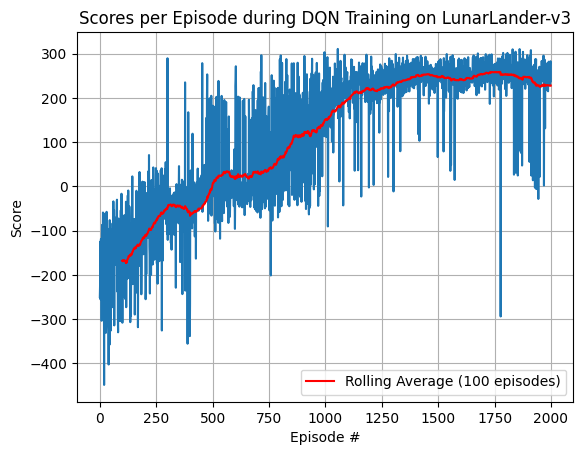

Huấn luyện hoàn tất. Model đã được lưu (checkpoint_best.pth hoặc checkpoint_solved.pth).
Đồ thị điểm số đã được lưu thành 'dqn_lunarlander_scores.png'.


In [20]:
import gymnasium as gym
env = gym.make('LunarLander-v3')

# Lấy thông tin state và action space
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
print(f'State size: {state_size}, Action size: {action_size}')

# Đặt seed cho reproducibility
seed = 42
env.reset(seed=seed) # Seed cho môi trường (nếu có)
# Các seed khác đã được đặt trong Agent và ReplayBuffer

# Khởi tạo Agent
agent = Agent(state_size=state_size, action_size=action_size, seed=seed)
print("Bắt đầu huấn luyện...")
scores = train_dqn(env, agent, n_episodes=2000, eps_decay=0.995, solved_score=200.0)

    # Đóng môi trường
env.close()

    # Vẽ đồ thị scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
    # Tính đường trung bình trượt
rolling_avg = np.convolve(scores, np.ones(100)/100, mode='valid')
plt.plot(np.arange(len(rolling_avg)) + 99, rolling_avg, color='red', label='Rolling Average (100 episodes)')

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Scores per Episode during DQN Training on LunarLander-v3')
plt.legend()
plt.grid(True)
plt.savefig('dqn_lunarlander_scores.png')
plt.show()

print("Huấn luyện hoàn tất. Model đã được lưu (checkpoint_best.pth hoặc checkpoint_solved.pth).")
print("Đồ thị điểm số đã được lưu thành 'dqn_lunarlander_scores.png'.")

In [21]:
run_test_agent(model_path="checkpoint_best.pth", episodes = 1000)


Chạy agent đã huấn luyện từ checkpoint_best.pth...
MoviePy - Building video d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4.
MoviePy - Writing video d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4



MoviePy - Done !
MoviePy - video ready d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4

Tổng số lần hạ cánh thành công (reward >= 200): 927 / 1000
Nhiên liệu tiêu hao trung bình: 199.67 / 1000


In [13]:
run_faild_test_agent(model_path = 'checkpoint_best.pth', episodes = 10)


🚀 Đang chạy agent từ checkpoint_best.pth...

MoviePy - Building video failed_videos\failed_episode_1.mp4.
MoviePy - Writing video failed_videos\failed_episode_1.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_1.mp4
MoviePy - Building video failed_videos\failed_episode_2.mp4.
MoviePy - Writing video failed_videos\failed_episode_2.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_2.mp4
MoviePy - Building video failed_videos\failed_episode_3.mp4.
MoviePy - Writing video failed_videos\failed_episode_3.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_3.mp4
MoviePy - Building video failed_videos\failed_episode_4.mp4.
MoviePy - Writing video failed_videos\failed_episode_4.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_4.mp4

📊 Tổng kết sau 10 episodes:
✅ Thành công: 6
❌ Thất bại: 4
⛽ Nhiên liệu tiêu hao trung bình: 191.11


# Thuật toán Proximal Policy Optimization (PPO)

## 1. Giới thiệu

Trong lĩnh vực học tăng cường (Reinforcement Learning – RL), các thuật toán chính sách (policy-based methods) đóng vai trò quan trọng trong việc học trực tiếp chiến lược hành động tối ưu. Trong số đó, **Proximal Policy Optimization (PPO)** là một trong những thuật toán hiện đại và phổ biến nhất, nổi bật nhờ tính hiệu quả, ổn định và khả năng triển khai đơn giản.

PPO được đề xuất bởi OpenAI nhằm cải thiện các phương pháp trước đó như **Trust Region Policy Optimization (TRPO)** – vốn yêu cầu tính toán phức tạp và không dễ áp dụng thực tế. PPO sử dụng một hàm mất mát mới giúp cập nhật chính sách một cách “gần đúng tối ưu” (proximal) để tránh việc cập nhật quá mạnh có thể làm mất tính ổn định của mô hình.

Trong dự án này, chúng tôi áp dụng PPO để giải quyết môi trường **LunarLander-v3** – một môi trường tiêu chuẩn trong OpenAI Gym, nơi một agent cần học cách điều khiển một tàu đổ bộ hạ cánh an toàn lên mặt đất trong điều kiện lực hấp dẫn và động lực học phức tạp.

---

## 2. Mô tả thuật toán

Thuật toán PPO thuộc nhóm **chính sách xác suất** (stochastic policy), hoạt động theo cách trực tiếp học một hàm ánh xạ từ trạng thái đến xác suất hành động. Ý tưởng chính của PPO là cập nhật chính sách mới một cách **có kiểm soát** bằng cách sử dụng một hàm mất mát có giới hạn (_clipped objective_) để đảm bảo sự khác biệt giữa chính sách mới và chính sách cũ không quá lớn.

### Hàm mất mát chính:

$$
L^{\text{CLIP}}(\theta) = \mathbb{E}_t \left[ \min \left( r_t(\theta) \hat{A}_t, \text{clip}(r_t(\theta), 1 - \epsilon, 1 + \epsilon)\hat{A}_t \right) \right]
$$

Trong đó:

- $r_t(\theta) = \frac{\pi_\theta(a_t|s_t)}{\pi_{\theta_{\text{old}}}(a_t|s_t)}$ là tỷ lệ xác suất giữa chính sách mới và cũ.
- $\hat{A}_t$ là ước lượng lợi ích (advantage).
- $\epsilon$ là hệ số giới hạn (clip parameter), thường được chọn là 0.1 hoặc 0.2.

Thuật toán PPO cũng đồng thời cập nhật **hàm giá trị** thông qua hàm mất mát:

$$
L^{\text{VF}}(\phi) = \left( V_\phi(s_t) - R_t \right)^2
$$

Trong đó $R_t$ là tổng phần thưởng mục tiêu (target return) tại thời điểm $t$.

---

## 3. Lý thuyết và mô hình hóa

PPO là một thuật toán thuộc họ **Actor-Critic**, trong đó:

- **Actor**: học chính sách xác suất $\pi_\theta(a|s)$.
- **Critic**: xấp xỉ giá trị trạng thái $V_\phi(s)$, để đánh giá hành động.

Kiến trúc tổng thể gồm hai mạng nơ-ron riêng biệt:
- Mạng chính sách (policy network): đầu vào là trạng thái, đầu ra là xác suất chọn hành động.
- Mạng giá trị (value network): đầu vào là trạng thái, đầu ra là giá trị $V(s)$.

---

## 4. Lý do chọn thuật toán PPO

Thuật toán PPO được lựa chọn cho dự án vì các lý do sau:

- ✅ **Tính ổn định cao**: Cập nhật chính sách có kiểm soát giúp tránh việc học không ổn định như ở REINFORCE hoặc Actor-Critic truyền thống.
- ✅ **Hiệu quả và đơn giản trong triển khai**: Không yêu cầu các bước phức tạp như giải bài toán tối ưu có ràng buộc như TRPO, dễ tích hợp vào các hệ thống RL hiện đại.
- ✅ **Phù hợp với bài toán liên tục và phức tạp**: PPO có khả năng xử lý tốt môi trường có không gian trạng thái và hành động lớn, như trong LunarLander.
- ✅ **Đã được chứng minh thực nghiệm**: PPO hiện là một trong những thuật toán RL được sử dụng phổ biến nhất với nhiều minh chứng về hiệu năng trên các benchmark như OpenAI Gym, MuJoCo, Atari...

---

> ⚙️ **Tóm lại**: PPO là một lựa chọn mạnh mẽ, cân bằng giữa lý thuyết và thực tiễn, lý tưởng cho các bài toán RL trong môi trường động học liên tục như LunarLander.


In [ ]:
import matplotlib.pyplot as plt
from collections import deque
from torch.distributions import Categorical

# Siêu tham số PPO cho môi trường LunarLander-v3

| Tên biến          | Giá trị         | Mô tả |
|-------------------|-----------------|-------|
| `ENV_NAME`        | "LunarLander-v3"| Tên môi trường từ Gym |
| `GAMMA`           | 0.99            | Hệ số chiết khấu cho phần thưởng tương lai |
| `LAMBDA`          | 0.95            | Hệ số GAE (Generalized Advantage Estimation) |
| `CLIP_EPS`        | 0.2             | Ngưỡng cắt clipping trong PPO để tránh cập nhật quá mạnh |
| `ENTROPY_COEF`    | 0.01            | Hệ số cho entropy bonus, khuyến khích đa dạng hành động |
| `VALUE_COEF`      | 0.5             | Hệ số trọng số cho loss của mạng giá trị (critic) |
| `LR`              | 3e-4            | Tốc độ học (learning rate) |
| `BATCH_SIZE`      | 64              | Kích thước batch tổng được dùng trong một lần huấn luyện |
| `MINI_BATCH_SIZE` | 32              | Kích thước mini-batch trong mỗi epoch |
| `EPOCHS`          | 10              | Số lần lặp lại trên mỗi batch trong một lần huấn luyện |
| `MAX_EPISODES`    | 3000            | Số lượng episode tối đa để huấn luyện |
| `MAX_STEPS`       | 1000            | Số bước tối đa trong mỗi episode |
| `DEVICE`          | cuda / cpu      | Thiết bị sử dụng để huấn luyện (GPU nếu khả dụng, ngược lại là CPU) |


In [ ]:
# ----- Hyperparameters -----
ENV_NAME = "LunarLander-v3"
GAMMA = 0.99
LAMBDA = 0.95  # GAE lambda
CLIP_EPS = 0.2
ENTROPY_COEF = 0.01
VALUE_COEF = 0.5
LR = 3e-4
BATCH_SIZE = 64
MINI_BATCH_SIZE = 32
EPOCHS = 10
MAX_EPISODES = 3000
MAX_STEPS = 1000
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mô hình Mạng Nơ-ron trong PPO

## 1. Mô hình `Actor`

- **Mục đích**: Dự đoán xác suất phân phối hành động từ trạng thái đầu vào.
- **Kiến trúc**:
  - Linear(`state_dim` → 256)
  - ReLU
  - Linear(256 → 256)
  - ReLU
  - Linear(256 → `action_dim`)

```python
class Actor(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(Actor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(state_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, action_dim),
        )
    
    def forward(self, x):
        return self.net(x)


# Init Agnet, Actor and Critric

In [ ]:
import matplotlib.pyplot as plt
from collections import deque
from torch.distributions import Categorical


# ----- Neural Network Models -----
class Actor(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(Actor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(state_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, action_dim),
        )
    
    def forward(self, x):
        return self.net(x)

class Critic(nn.Module):
    def __init__(self, state_dim):
        super(Critic, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(state_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
        )
    
    def forward(self, x):
        return self.net(x).squeeze(-1)  # output shape: (batch,)

# ----- PPO Agent -----
class PPOAgent:
    def __init__(self, env):
        self.env = env
        self.state_dim = env.observation_space.shape[0]
        self.action_dim = env.action_space.n
        
        self.actor = Actor(self.state_dim, self.action_dim).to(DEVICE)
        self.critic = Critic(self.state_dim).to(DEVICE)
        
        self.optimizer = optim.Adam(
            list(self.actor.parameters()) + list(self.critic.parameters()), lr=LR
        )
        
        self.memory = []

    def select_action(self, state):
        state = torch.FloatTensor(state).to(DEVICE)
        logits = self.actor(state)
        dist = Categorical(logits=logits)
        action = dist.sample()
        log_prob = dist.log_prob(action)
        value = self.critic(state)
        return action.item(), log_prob.detach(), value.detach()

    def compute_gae(self, rewards, values, dones):
        values = values + [0]  # add bootstrap value for last state
        gae = 0
        returns = []
        for step in reversed(range(len(rewards))):
            delta = rewards[step] + GAMMA * values[step + 1] * (1 - dones[step]) - values[step]
            gae = delta + GAMMA * LAMBDA * (1 - dones[step]) * gae
            returns.insert(0, gae + values[step])
        return returns

    def store_transition(self, transition):
        self.memory.append(transition)

    def learn(self):
        # Convert memory to tensors
        states = torch.FloatTensor([t[0] for t in self.memory]).to(DEVICE)
        actions = torch.LongTensor([t[1] for t in self.memory]).to(DEVICE)
        rewards = [t[2] for t in self.memory]
        next_states = torch.FloatTensor([t[3] for t in self.memory]).to(DEVICE)
        dones = [t[4] for t in self.memory]
        old_log_probs = torch.FloatTensor([t[5] for t in self.memory]).to(DEVICE)
        values = [t[6].item() for t in self.memory]

        returns = self.compute_gae(rewards, values, dones)
        returns = torch.FloatTensor(returns).to(DEVICE)
        values = torch.FloatTensor(values).to(DEVICE)
        advantages = returns - values
        advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)

        # PPO update with multiple epochs and mini batches
        for _ in range(EPOCHS):
            for idx in range(0, len(self.memory), MINI_BATCH_SIZE):
                batch_idx = slice(idx, idx + MINI_BATCH_SIZE)
                batch_states = states[batch_idx]
                batch_actions = actions[batch_idx]
                batch_old_log_probs = old_log_probs[batch_idx]
                batch_returns = returns[batch_idx]
                batch_advantages = advantages[batch_idx]

                logits = self.actor(batch_states)
                dist = Categorical(logits=logits)
                entropy = dist.entropy().mean()
                new_log_probs = dist.log_prob(batch_actions)

                ratio = (new_log_probs - batch_old_log_probs).exp()
                surrogate1 = ratio * batch_advantages
                surrogate2 = torch.clamp(ratio, 1 - CLIP_EPS, 1 + CLIP_EPS) * batch_advantages
                actor_loss = -torch.min(surrogate1, surrogate2).mean()

                value = self.critic(batch_states)
                critic_loss = (batch_returns - value).pow(2).mean()

                loss = actor_loss + VALUE_COEF * critic_loss - ENTROPY_COEF * entropy

                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

        self.memory = []  # clear memory after learning


# Train agent

In [ ]:
# ----- Training Loop -----
def train():
    env = gym.make(ENV_NAME)
    agent = PPOAgent(env)

    all_rewards = []
    print_interval = 10
    best_avg_reward = -float('inf')  # Khởi tạo điểm tốt nhất

    for episode in range(1, MAX_EPISODES + 1):
        state, _ = env.reset()  # Gym >=0.26 trả (obs, info)
        episode_reward = 0

        for step in range(MAX_STEPS):
            action, log_prob, value = agent.select_action(state)
            next_state, reward, done, truncated, _ = env.step(action)
            done = done or truncated

            agent.store_transition((state, action, reward, next_state, done, log_prob.item(), value))
            episode_reward += reward
            state = next_state

            if done:
                break

        agent.learn()
        all_rewards.append(episode_reward)

        if episode % print_interval == 0:
            avg_reward = np.mean(all_rewards[-print_interval:])
            print(f"Episode {episode} Average Reward: {avg_reward:.2f}")

            # Nếu điểm trung bình tốt hơn trước, lưu mô hình
            if avg_reward > best_avg_reward:
                best_avg_reward = avg_reward
                torch.save(agent.actor.state_dict(), "best_actor.pth")
                torch.save(agent.critic.state_dict(), "best_critic.pth")
                print(f"✅ New best average reward: {best_avg_reward:.2f} - model saved!")

    env.close()
    plt.close()
    plt.figure(figsize=(12, 6))
    plt.plot(all_rewards, label="Episode Reward")
    plt.plot(
        [np.mean(all_rewards[max(0, i - print_interval):i + 1]) for i in range(len(all_rewards))],
        label=f"{print_interval}-Episode Moving Avg", linestyle="--"
    )
    plt.xlabel("Episode")
    plt.ylabel("Reward")
    plt.title("PPO Training Performance on LunarLander")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("training_rewards.png")
    plt.show()

## Test Agent and render successful video

In [73]:
import os
import gymnasium as gym
from gym.wrappers import RecordVideo
import torch
from torch.distributions.categorical import Categorical

def run_test_agent_ppo(actor_path, episodes, env_name='LunarLander-v3', video_folder='successful_videos'):
    env = gym.make(env_name)
    
    # Môi trường ghi video, ban đầu chưa dùng
    video_env = RecordVideo(gym.make(env_name, render_mode='rgb_array'), 
                            video_folder=video_folder, episode_trigger=lambda episode_id: True)

    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    # Load actor network
    actor = Actor(state_dim, action_dim).to(DEVICE)
    actor.load_state_dict(torch.load(actor_path, map_location=DEVICE, weights_only=True))
    actor.eval()

    success_landing = 0
    fuel_penalty = 0
    video_saved = False
    success_episode = None

    # 1. Test tất cả episodes bình thường trên env không ghi video
    for ep in range(1, episodes + 1):
        state, _ = env.reset()
        episode_reward = 0
        done = False
        truncated = False

        while not (done or truncated):
            state_tensor = torch.FloatTensor(state).to(DEVICE)
            logits = actor(state_tensor)
            dist = Categorical(logits=logits)
            action = dist.sample().item()

            next_state, reward, done, truncated, _ = env.step(action)
            episode_reward += reward
            state = next_state

            if reward < 0:
                fuel_penalty += abs(reward)

        if episode_reward >= 200:
            success_landing += 1
            if success_episode is None:
                success_episode = ep
                print(f"✅ First success at episode {success_episode}")

    env.close()

    avg_fuel = fuel_penalty / episodes
    print(f"\nTổng số lần hạ cánh thành công (reward >= 200): {success_landing} / {episodes}")
    print(f"Nhiên liệu tiêu hao trung bình: {avg_fuel:.2f} / episode")

    # 2. Nếu có episode thành công, ghi video lại đúng episode thành công đầu tiên
    if success_episode is not None:
        print(f"🎥 Ghi video cho episode thành công đầu tiên: {success_episode}")

        # Ở môi trường video mới, chỉ ghi video đúng episode đầu tiên (vì ta chỉ chạy 1 episode)
        def episode_trigger(ep_idx):
            return ep_idx == 0

        video_env = RecordVideo(gym.make(env_name, render_mode='rgb_array'), 
                               video_folder=video_folder, episode_trigger=episode_trigger)

        state, _ = video_env.reset()
        done = False
        truncated = False
        episode_reward = 0

        while not (done or truncated):
            state_tensor = torch.FloatTensor(state).to(DEVICE)
            logits = actor(state_tensor)
            dist = Categorical(logits=logits)
            action = dist.sample().item()

            next_state, reward, done, truncated, _ = video_env.step(action)
            episode_reward += reward
            state = next_state

        video_env.close()
        print(f"🎬 Video lưu tại thư mục: {os.path.abspath(video_folder)}")


## Render failed Video

In [90]:
import os
import gymnasium as gym
import torch
from moviepy import ImageSequenceClip
from torch.distributions import Categorical

def test_fail_ppo(actor_path, episodes, env_name='LunarLander-v3', video_folder='failed_videos'):
    print(f"\n🚀 Đang chạy agent PPO từ {actor_path} để ghi lại các trường hợp thất bại...\n")
    
    os.makedirs(video_folder, exist_ok=True)

    # Khởi tạo môi trường để lấy thông tin
    env = gym.make(env_name)
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.n

    # Load actor network
    actor = Actor(state_dim, action_dim).to(DEVICE)
    actor.load_state_dict(torch.load(actor_path, map_location=DEVICE, weights_only=True))
    actor.eval()

    success_landing = 0
    fail_count = 0
    fuel_penalty = 0

    for i in range(episodes):
        temp_env = gym.make(env_name, render_mode='rgb_array')
        state, _ = temp_env.reset()
        done = False
        truncated = False
        total_reward = 0
        frames = []

        while not (done or truncated):
            # Lấy action từ actor
            state_tensor = torch.FloatTensor(state).to(DEVICE)
            logits = actor(state_tensor)
            dist = Categorical(logits=logits)
            action = dist.sample().item()

            next_state, reward, done, truncated, _ = temp_env.step(action)
            state = next_state
            total_reward += reward
            fuel_penalty += abs(min(reward, 0))  # chỉ tính phần tiêu hao nhiên liệu

            # Lưu frame để tạo video
            frame = temp_env.render()
            frames.append(frame)

        if total_reward >= 200:
            success_landing += 1
        else:
            fail_count += 1
            video_path = os.path.join(video_folder, f"failed_episode_{fail_count}.mp4")
            print(f"❌ Episode {i + 1} thất bại - Reward: {total_reward:.2f} → lưu video: {video_path}")
            clip = ImageSequenceClip(frames, fps=30)
            clip.write_videofile(video_path, codec="libx264", audio=False)

        temp_env.close()

    env.close()

    print(f"\n📊 Tổng kết sau {episodes} episodes:")
    print(f"✅ Thành công: {success_landing}")
    print(f"❌ Thất bại: {fail_count}")
    print(f"⛽ Nhiên liệu tiêu hao trung bình: {round(fuel_penalty / episodes, 2)}")


# Version 1. Khởi đầu.

In [77]:
# ----- Hyperparameters -----
ENV_NAME = "LunarLander-v3"
GAMMA = 0.99
LAMBDA = 0.95  # GAE lambda
CLIP_EPS = 0.2
ENTROPY_COEF = 0.01
VALUE_COEF = 0.5
LR = 3e-4
BATCH_SIZE = 64
MINI_BATCH_SIZE = 32
EPOCHS = 10
MAX_EPISODES = 3000
MAX_STEPS = 1000
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Episode 10 Average Reward: -272.12
✅ New best average reward: -272.12 - model saved!
Episode 20 Average Reward: -312.65
Episode 30 Average Reward: -179.07
✅ New best average reward: -179.07 - model saved!
Episode 40 Average Reward: -131.57
✅ New best average reward: -131.57 - model saved!
Episode 50 Average Reward: -166.60
Episode 60 Average Reward: -149.61
Episode 70 Average Reward: -229.90
Episode 80 Average Reward: -90.68
✅ New best average reward: -90.68 - model saved!
Episode 90 Average Reward: -143.43
Episode 100 Average Reward: -98.64
Episode 110 Average Reward: -140.65
Episode 120 Average Reward: -125.05
Episode 130 Average Reward: -129.40
Episode 140 Average Reward: -150.29
Episode 150 Average Reward: -163.85
Episode 160 Average Reward: -140.04
Episode 170 Average Reward: -116.10
Episode 180 Average Reward: -140.84
Episode 190 Average Reward: -95.10
Episode 200 Average Reward: -88.49
✅ New best average reward: -88.49 - model saved!
Episode 210 Average Reward: -101.39
Episode 2

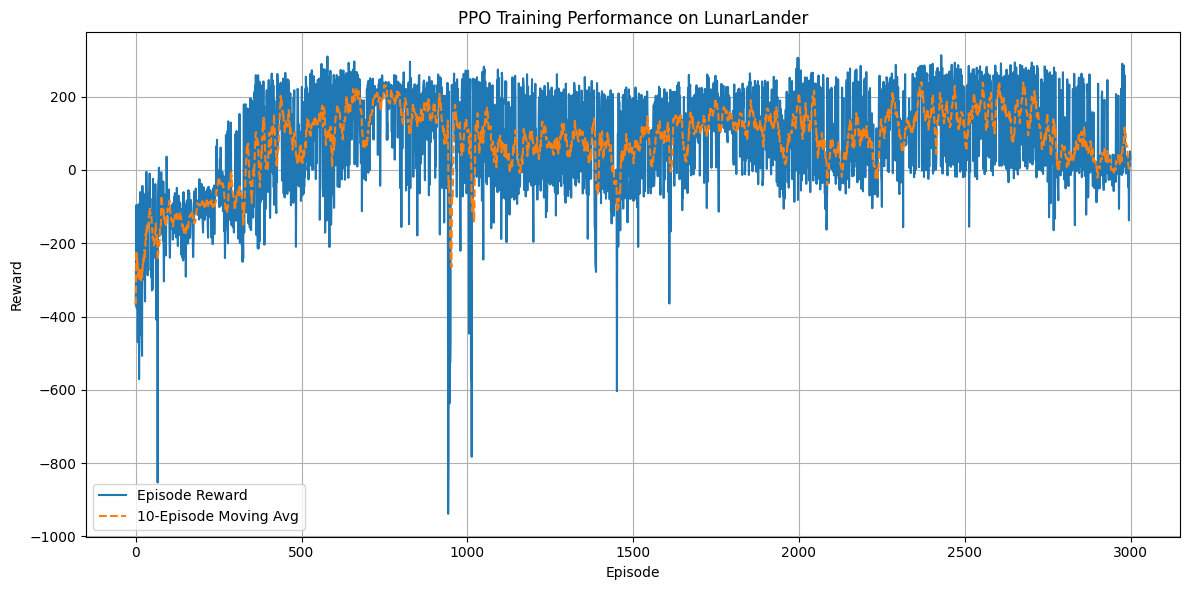

In [78]:
train()

In [84]:
run_test_agent_ppo(actor_path="best_actor.pth", episodes=1000)

✅ First success at episode 1

Tổng số lần hạ cánh thành công (reward >= 200): 386 / 1000
Nhiên liệu tiêu hao trung bình: 183.00 / episode
🎥 Ghi video cho episode thành công đầu tiên: 1
MoviePy - Building video d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4.
MoviePy - Writing video d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4



MoviePy - Done !
MoviePy - video ready d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4
🎬 Video lưu tại thư mục: d:\nam2\csttnt\Lunar_Lander\successful_videos


### Successful video

In [151]:
show_video(r"successful_videos\PPO\version1.mp4")

### Failed video

In [152]:
show_video(r"D:\nam2\csttnt\Lunar_Lander\failed_videos\PPO\Version2\failed_episode_3.mp4")

# Version 2

## Lí do:
+ Dễ dàng nhận thấy rằng Agent có hiệu suất cưc kì tệ, thất bại quá nhiều

## Giải pháp:
+ Tối ưu hóa siêu tham số
+ Giảm Lr, tăng batch_size, tăng entropy_coef, tăng episodes,..

## Lợi ích mong đợi:
+ Tối ưu hóa hiệu suẩt
+ Giảm tỉ lệ thất bại.

In [85]:
ENV_NAME = "LunarLander-v3"
GAMMA = 0.99                # Discount factor, giữ nguyên
LAMBDA = 0.95               # GAE lambda, giữ nguyên

CLIP_EPS = 0.2              # Clipping range for PPO (giữ nguyên)

ENTROPY_COEF = 0.02         # Tăng nhẹ entropy để khuyến khích đa dạng hành vi
VALUE_COEF = 0.5            # Giữ nguyên trọng số critic

LR = 2.5e-4                 # Giảm learning rate để ổn định training

BATCH_SIZE = 2048           # Tăng batch size -> giúp ổn định cập nhật chính sách
MINI_BATCH_SIZE = 256       # Lớn hơn để tận dụng GPU và giảm nhiễu
EPOCHS = 10                 # Giữ nguyên số vòng cập nhật PPO mỗi batch

MAX_EPISODES = 5000         # Tăng số episode để đảm bảo đủ training
MAX_STEPS = 1000            # Số bước mỗi episode, giữ nguyên

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Episode 10 Average Reward: -288.39
✅ New best average reward: -288.39 - model saved!
Episode 20 Average Reward: -250.77
✅ New best average reward: -250.77 - model saved!
Episode 30 Average Reward: -266.36
Episode 40 Average Reward: -228.17
✅ New best average reward: -228.17 - model saved!
Episode 50 Average Reward: -173.35
✅ New best average reward: -173.35 - model saved!
Episode 60 Average Reward: -98.14
✅ New best average reward: -98.14 - model saved!
Episode 70 Average Reward: -87.86
✅ New best average reward: -87.86 - model saved!
Episode 80 Average Reward: -261.64
Episode 90 Average Reward: -123.72
Episode 100 Average Reward: -64.14
✅ New best average reward: -64.14 - model saved!
Episode 110 Average Reward: -40.90
✅ New best average reward: -40.90 - model saved!
Episode 120 Average Reward: -107.44
Episode 130 Average Reward: -27.06
✅ New best average reward: -27.06 - model saved!
Episode 140 Average Reward: -80.56
Episode 150 Average Reward: -9.81
✅ New best average reward: -9.81

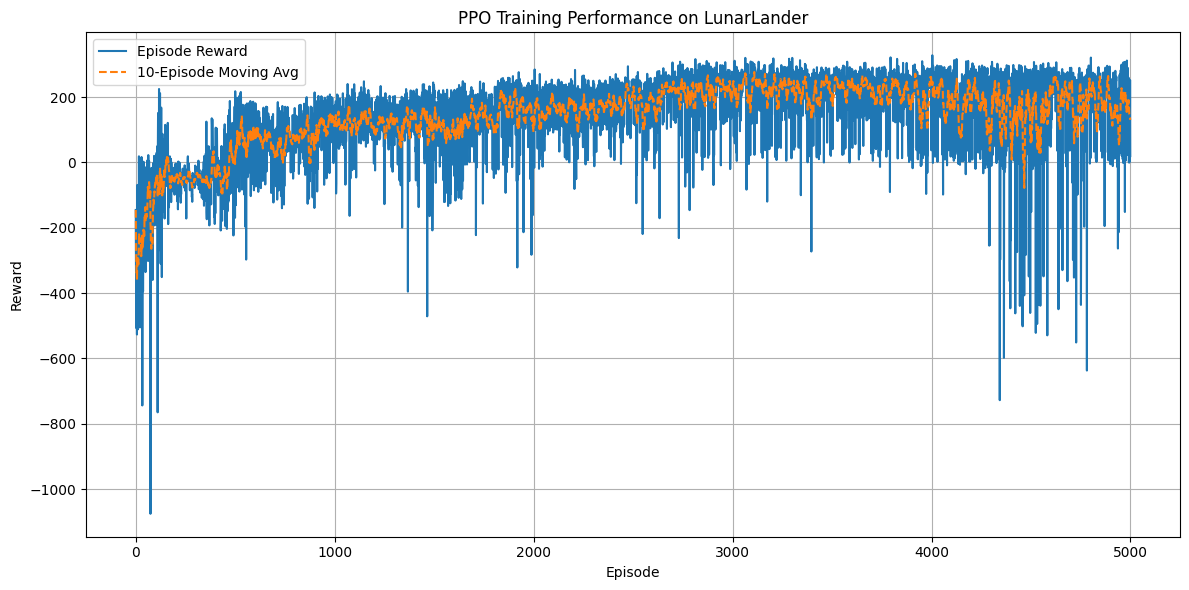

In [86]:
train()

In [87]:
run_test_agent_ppo(actor_path="best_actor.pth", episodes=1000)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


d:\nam2\csttnt\Lunar_Lander\ten_env\Lib\site-packages\gym\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\nam2\csttnt\Lunar_Lander\successful_videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


✅ First success at episode 2

Tổng số lần hạ cánh thành công (reward >= 200): 796 / 1000
Nhiên liệu tiêu hao trung bình: 127.79 / episode
🎥 Ghi video cho episode thành công đầu tiên: 2
MoviePy - Building video d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4.
MoviePy - Writing video d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4



MoviePy - Done !
MoviePy - video ready d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4
🎬 Video lưu tại thư mục: d:\nam2\csttnt\Lunar_Lander\successful_videos


In [93]:
test_fail_ppo(actor_path="model/PPO/Version2/best_actor.pth", episodes = 100)


🚀 Đang chạy agent PPO từ model/PPO/Version2/best_actor.pth để ghi lại các trường hợp thất bại...

❌ Episode 12 thất bại - Reward: 24.42 → lưu video: failed_videos\failed_episode_1.mp4
MoviePy - Building video failed_videos\failed_episode_1.mp4.
MoviePy - Writing video failed_videos\failed_episode_1.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_1.mp4


❌ Episode 19 thất bại - Reward: 128.59 → lưu video: failed_videos\failed_episode_2.mp4
MoviePy - Building video failed_videos\failed_episode_2.mp4.
MoviePy - Writing video failed_videos\failed_episode_2.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_2.mp4
❌ Episode 32 thất bại - Reward: 24.07 → lưu video: failed_videos\failed_episode_3.mp4
MoviePy - Building video failed_videos\failed_episode_3.mp4.
MoviePy - Writing video failed_videos\failed_episode_3.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_3.mp4


❌ Episode 42 thất bại - Reward: 150.43 → lưu video: failed_videos\failed_episode_4.mp4
MoviePy - Building video failed_videos\failed_episode_4.mp4.
MoviePy - Writing video failed_videos\failed_episode_4.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_4.mp4
❌ Episode 47 thất bại - Reward: 28.99 → lưu video: failed_videos\failed_episode_5.mp4
MoviePy - Building video failed_videos\failed_episode_5.mp4.
MoviePy - Writing video failed_videos\failed_episode_5.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_5.mp4
❌ Episode 48 thất bại - Reward: 141.35 → lưu video: failed_videos\failed_episode_6.mp4
MoviePy - Building video failed_videos\failed_episode_6.mp4.
MoviePy - Writing video failed_videos\failed_episode_6.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_6.mp4
❌ Episode 62 thất bại - Reward: 127.73 → lưu video: failed_videos\failed_episode_7.mp4
MoviePy - Building video failed_videos\failed_episode_7.mp4.
MoviePy - Writing video failed_videos\failed_episode_7.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_7.mp4
❌ Episode 67 thất bại - Reward: 141.84 → lưu video: failed_videos\failed_episode_8.mp4
MoviePy - Building video failed_videos\failed_episode_8.mp4.
MoviePy - Writing video failed_videos\failed_episode_8.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_8.mp4
❌ Episode 80 thất bại - Reward: 10.96 → lưu video: failed_videos\failed_episode_9.mp4
MoviePy - Building video failed_videos\failed_episode_9.mp4.
MoviePy - Writing video failed_videos\failed_episode_9.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_9.mp4
❌ Episode 81 thất bại - Reward: 140.01 → lưu video: failed_videos\failed_episode_10.mp4
MoviePy - Building video failed_videos\failed_episode_10.mp4.
MoviePy - Writing video failed_videos\failed_episode_10.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_10.mp4
❌ Episode 82 thất bại - Reward: 31.41 → lưu video: failed_videos\failed_episode_11.mp4
MoviePy - Building video failed_videos\failed_episode_11.mp4.
MoviePy - Writing video failed_videos\failed_episode_11.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_11.mp4
❌ Episode 83 thất bại - Reward: 107.07 → lưu video: failed_videos\failed_episode_12.mp4
MoviePy - Building video failed_videos\failed_episode_12.mp4.
MoviePy - Writing video failed_videos\failed_episode_12.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_12.mp4
❌ Episode 85 thất bại - Reward: 113.26 → lưu video: failed_videos\failed_episode_13.mp4
MoviePy - Building video failed_videos\failed_episode_13.mp4.
MoviePy - Writing video failed_videos\failed_episode_13.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_13.mp4
❌ Episode 99 thất bại - Reward: 19.28 → lưu video: failed_videos\failed_episode_14.mp4
MoviePy - Building video failed_videos\failed_episode_14.mp4.
MoviePy - Writing video failed_videos\failed_episode_14.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_14.mp4

📊 Tổng kết sau 100 episodes:
✅ Thành công: 86
❌ Thất bại: 14
⛽ Nhiên liệu tiêu hao trung bình: 115.67


### Successful Video

In [153]:
show_video(r"D:\nam2\csttnt\Lunar_Lander\successful_videos\PPO\version2.mp4")

### Failed video

In [154]:
show_video(r"failed_videos\PPO\Version2\failed_episode_10.mp4")

# Version 3

## Lí do:
+ Agent khi bay trên không bị lao xuống quá nhanh
+ Agent bị xoay và nghiêng quá cao khi ở trên không
+ -> Hậu quả: Làm cho Agent lao đầu xuống đất rất nhanh và bij gãy chân, 1 số trường hợp thì đáp đất sai vị trí. 

## Giải pháp:
+ Thêm hàm điểm thưởng để thay đổi hành vi của Agent.
+ Thay đổi siêu tham số với BATCH_SIZE cao hơn, MAX_EPISODES thấp hơn chút

## Lợi ích mong đợi:
+ Tối ưu hóa hiệu suất
+ Tăng khả năng đáp đất thành công của Agent 
+ Thay đổi được hành vi lắc trên không của Agent

In [99]:
ENV_NAME = "LunarLander-v3"
GAMMA = 0.99                # Discount factor, giữ nguyên
LAMBDA = 0.95               # GAE lambda, giữ nguyên

CLIP_EPS = 0.2              # Clipping range for PPO (giữ nguyên)

ENTROPY_COEF = 0.02         # Tăng nhẹ entropy để khuyến khích đa dạng hành vi
VALUE_COEF = 0.5            # Giữ nguyên trọng số critic

LR = 2.5e-4                 # Giảm learning rate để ổn định training

BATCH_SIZE = 2048           # Tăng batch size -> giúp ổn định cập nhật chính sách
MINI_BATCH_SIZE = 256       # Lớn hơn để tận dụng GPU và giảm nhiễu
EPOCHS = 10                 # Giữ nguyên số vòng cập nhật PPO mỗi batch

MAX_EPISODES = 3000         # Tăng số episode để đảm bảo đủ training
MAX_STEPS = 1000            # Số bước mỗi episode, giữ nguyên

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [118]:
import numpy as np

def shaped_reward_adaptive_v1(original_reward, next_state):
    shaped_add = 0.0  # Phần thưởng/phạt sẽ được cộng vào original_reward

    x_pos = next_state[0]
    y_pos = next_state[1]
    x_vel = next_state[2]
    y_vel = next_state[3]
    angle = next_state[4]
    angular_vel = next_state[5]
    left_leg_contact = next_state[6] > 0.5 # Chuyển thành boolean cho dễ đọc
    right_leg_contact = next_state[7] > 0.5

    both_legs_contact = left_leg_contact and right_leg_contact
    one_leg_contact = (left_leg_contact and not right_leg_contact) or \
                      (right_leg_contact and not left_leg_contact)
    is_airborne = not both_legs_contact

    # --- Hằng số và ngưỡng ---
    # Quan trọng: Các giá trị này cần được tinh chỉnh rất kỹ!
    Y_CRITICAL_ALTITUDE = 0.15  # Độ cao cực kỳ quan trọng
    Y_APPROACH_ALTITUDE = 0.7   # Độ cao bắt đầu pha tiếp cận
    X_TARGET_ZONE_HALF_WIDTH = 0.1 # Nửa độ rộng vùng đáp mục tiêu
    ANGLE_STABLE_RAD = 0.08     # Góc nghiêng ổn định (khoảng 4.5 độ)
    ANGULAR_VEL_STABLE_RAD_S = 0.1
    X_VEL_STABLE = 0.1
    Y_VEL_IDEAL_DESCENT = -0.15 # Vận tốc dọc lý tưởng khi hạ cánh
    Y_VEL_MAX_IMPACT = -0.4     # Vận tốc dọc tối đa chấp nhận được khi chạm đất
    Y_VEL_MIN_DESCENT_PROGRESS = -0.02 # Vận tốc dọc tối thiểu để coi là đang tiến bộ hạ cánh

    # Hệ số phạt/thưởng
    K_X_POS = 0.8
    K_ANGLE = 2.0        # Góc rất quan trọng
    K_ANGULAR_VEL = 1.0
    K_X_VEL = 0.5
    K_Y_VEL_DEVIATION = 1.5
    K_HOVER_PENALTY = 0.3

    REWARD_PROGRESS_TOWARDS_CENTER = 0.02
    REWARD_STABLE_ONE_LEG = 0.15
    REWARD_GOOD_DESCENT_PROFILE = 0.1
    PENALTY_IMMINENT_CRASH_ANGLE = -1.5
    PENALTY_IMMINENT_CRASH_VEL = -2.0


    if is_airborne:
        # --- Trọng số dựa trên độ cao ---
        # Gần mặt đất hơn -> trọng số cao hơn cho các yếu tố ổn định
        # altitude_weight = 1.0 + max(0, (Y_APPROACH_ALTITUDE - y_pos) / Y_APPROACH_ALTITUDE * 2.0)
        # Hoặc một cách tiếp cận khác: các hình phạt tăng mạnh khi ở dưới Y_CRITICAL_ALTITUDE
        critical_zone_multiplier = 1.0
        if y_pos < Y_CRITICAL_ALTITUDE:
            critical_zone_multiplier = 3.0 # Phạt mạnh hơn gấp 3 lần trong vùng cực kỳ nguy hiểm
        elif y_pos < Y_APPROACH_ALTITUDE:
            critical_zone_multiplier = 1.5 # Phạt mạnh hơn một chút trong vùng tiếp cận


        # 1. Hình phạt cho các mối nguy hiểm tức thời (ngăn chặn rơi)
        if abs(angle) > np.pi / 4: # Nghiêng hơn 45 độ
            shaped_add += PENALTY_IMMINENT_CRASH_ANGLE * critical_zone_multiplier
        if abs(angular_vel) > 1.0:
            shaped_add -= 0.5 * critical_zone_multiplier # Phạt xoay quá nhanh

        # 2. Hình phạt cho độ lệch so với trạng thái bay/tiếp cận lý tưởng
        # Sử dụng hàm phạt mượt mà hơn thay vì ngưỡng cứng
        # Phạt xa tâm
        x_deviation = abs(x_pos) - X_TARGET_ZONE_HALF_WIDTH
        if x_deviation > 0:
            shaped_add -= K_X_POS * x_deviation * critical_zone_multiplier
        elif abs(x_pos) < X_TARGET_ZONE_HALF_WIDTH / 2 and y_pos > Y_CRITICAL_ALTITUDE : # Thưởng nhẹ nếu ở rất gần tâm khi đang bay
            shaped_add += REWARD_PROGRESS_TOWARDS_CENTER * (1.0 - y_pos/Y_APPROACH_ALTITUDE) # Thưởng giảm khi y_pos tăng

        # Phạt góc nghiêng
        angle_deviation = abs(angle) - ANGLE_STABLE_RAD
        if angle_deviation > 0:
            shaped_add -= K_ANGLE * angle_deviation * critical_zone_multiplier

        # Phạt vận tốc góc
        angular_vel_deviation = abs(angular_vel) - ANGULAR_VEL_STABLE_RAD_S
        if angular_vel_deviation > 0:
            shaped_add -= K_ANGULAR_VEL * angular_vel_deviation * critical_zone_multiplier

        # Phạt vận tốc ngang (quan trọng khi gần mặt đất)
        if y_pos < Y_APPROACH_ALTITUDE:
            x_vel_deviation = abs(x_vel) - X_VEL_STABLE
            if x_vel_deviation > 0:
                shaped_add -= K_X_VEL * x_vel_deviation * critical_zone_multiplier

        # 3. Kiểm soát tốc độ hạ cánh và phạt lơ lửng
        if y_pos < Y_APPROACH_ALTITUDE:
            # Phạt nếu tốc độ hạ cánh quá nhanh hoặc đang bay lên khi gần mặt đất
            if y_vel < Y_VEL_MAX_IMPACT * 1.2: # Rơi quá nhanh
                shaped_add += PENALTY_IMMINENT_CRASH_VEL * critical_zone_multiplier * (abs(y_vel) / abs(Y_VEL_MAX_IMPACT)) # Tỷ lệ với độ nguy hiểm
            elif y_vel > 0.05 and y_pos < Y_CRITICAL_ALTITUDE * 2: # Bay lên khi rất gần mặt đất
                shaped_add -= K_Y_VEL_DEVIATION * y_vel * critical_zone_multiplier * 2.0

            # Thưởng/Phạt dựa trên việc có đang tiến gần vận tốc hạ cánh lý tưởng không
            y_vel_diff_from_ideal = abs(y_vel - Y_VEL_IDEAL_DESCENT)
            if y_vel < Y_VEL_MIN_DESCENT_PROGRESS and y_vel > Y_VEL_MAX_IMPACT: # Đang hạ cánh với tốc độ hợp lý
                shaped_add += REWARD_GOOD_DESCENT_PROFILE * (1.0 - y_vel_diff_from_ideal) # Thưởng nhiều hơn nếu gần ideal
            else: # Không hạ cánh hoặc hạ cánh quá chậm/nhanh
                 shaped_add -= K_Y_VEL_DEVIATION * y_vel_diff_from_ideal * 0.1 * critical_zone_multiplier # Phạt nhẹ

            # Phạt lơ lửng (hovering) ở độ cao thấp mà không có chân nào chạm đất
            if abs(y_vel) < 0.03 and y_pos < Y_CRITICAL_ALTITUDE and not one_leg_contact:
                shaped_add -= K_HOVER_PENALTY * critical_zone_multiplier

        # 4. Xử lý khi một chân chạm đất
        if one_leg_contact:
            # Khuyến khích giữ ổn định để chân kia chạm đất
            is_stable_one_leg = abs(angle) < ANGLE_STABLE_RAD * 1.5 and \
                                abs(angular_vel) < ANGULAR_VEL_STABLE_RAD_S * 1.5 and \
                                abs(x_pos) < X_TARGET_ZONE_HALF_WIDTH * 1.5
            if is_stable_one_leg:
                shaped_add += REWARD_STABLE_ONE_LEG
            else: # Phạt nếu mất ổn định khi một chân đã chạm
                shaped_add -= REWARD_STABLE_ONE_LEG * 0.8 # Phạt mạnh hơn nếu không giữ được

    else: # Cả hai chân đã chạm đất (both_legs_contact)
        # Khi đã đáp, chỉ phạt nếu mất ổn định nghiêm trọng trở lại
        # Phần thưởng gốc +100/+140 cho việc đáp thành công là chính
        # Kiểm tra xem có đang "trượt" hoặc "lật" sau khi đã đáp không
        post_landing_instability_penalty = 0.0
        if abs(x_vel) > X_VEL_STABLE * 1.5 or abs(y_vel) > 0.1: # Vận tốc lớn sau khi đáp
            post_landing_instability_penalty += 0.5 * (abs(x_vel) + abs(y_vel))
        if abs(angle) > ANGLE_STABLE_RAD * 2.0: # Nghiêng nhiều sau khi đáp
            post_landing_instability_penalty += 1.0 * abs(angle)
        if abs(angular_vel) > ANGULAR_VEL_STABLE_RAD_S * 2.0:
            post_landing_instability_penalty += 0.5 * abs(angular_vel)

        shaped_add -= post_landing_instability_penalty

    return original_reward + shaped_add

In [119]:
def train():
    env = gym.make(ENV_NAME)
    agent = PPOAgent(env)

    all_rewards = []
    print_interval = 10
    best_avg_reward = -float('inf')  # Khởi tạo điểm tốt nhất

    for episode in range(1, MAX_EPISODES + 1):
        state, _ = env.reset()  # Gym >=0.26 trả (obs, info)
        episode_reward = 0

        for step in range(MAX_STEPS):
            action, log_prob, value = agent.select_action(state)
            next_state, reward, done, truncated, _ = env.step(action)
            done = done or truncated
            shaped = shaped_reward(reward, next_state)
            agent.store_transition((state, action, shaped, next_state, done, log_prob.item(), value))
            episode_reward += reward
            state = next_state

            if done:
                break

        agent.learn()
        all_rewards.append(episode_reward)

        if episode % print_interval == 0:
            avg_reward = np.mean(all_rewards[-print_interval:])
            print(f"Episode {episode} Average Reward: {avg_reward:.2f}")

            # Nếu điểm trung bình tốt hơn trước, lưu mô hình
            if avg_reward > best_avg_reward:
                best_avg_reward = avg_reward
                torch.save(agent.actor.state_dict(), "best_actor.pth")
                torch.save(agent.critic.state_dict(), "best_critic.pth")
                print(f"✅ New best average reward: {best_avg_reward:.2f} - model saved!")

    env.close()
    plt.close()
    plt.figure(figsize=(12, 6))
    plt.plot(all_rewards, label="Episode Reward")
    plt.plot(
        [np.mean(all_rewards[max(0, i - print_interval):i + 1]) for i in range(len(all_rewards))],
        label=f"{print_interval}-Episode Moving Avg", linestyle="--"
    )
    plt.xlabel("Episode")
    plt.ylabel("Reward")
    plt.title("PPO Training Performance on LunarLander")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("training_rewards.png")
    plt.show()

Episode 10 Average Reward: -163.30
✅ New best average reward: -163.30 - model saved!
Episode 20 Average Reward: -223.58
Episode 30 Average Reward: -101.26
✅ New best average reward: -101.26 - model saved!
Episode 40 Average Reward: -210.95
Episode 50 Average Reward: -247.22
Episode 60 Average Reward: -114.74
Episode 70 Average Reward: -159.90
Episode 80 Average Reward: -98.93
✅ New best average reward: -98.93 - model saved!
Episode 90 Average Reward: -124.02
Episode 100 Average Reward: -110.93
Episode 110 Average Reward: -61.31
✅ New best average reward: -61.31 - model saved!
Episode 120 Average Reward: -95.12
Episode 130 Average Reward: -37.53
✅ New best average reward: -37.53 - model saved!
Episode 140 Average Reward: -39.63
Episode 150 Average Reward: -68.18
Episode 160 Average Reward: -116.04
Episode 170 Average Reward: -97.39
Episode 180 Average Reward: -55.46
Episode 190 Average Reward: -3.08
✅ New best average reward: -3.08 - model saved!
Episode 200 Average Reward: -35.14
Episo

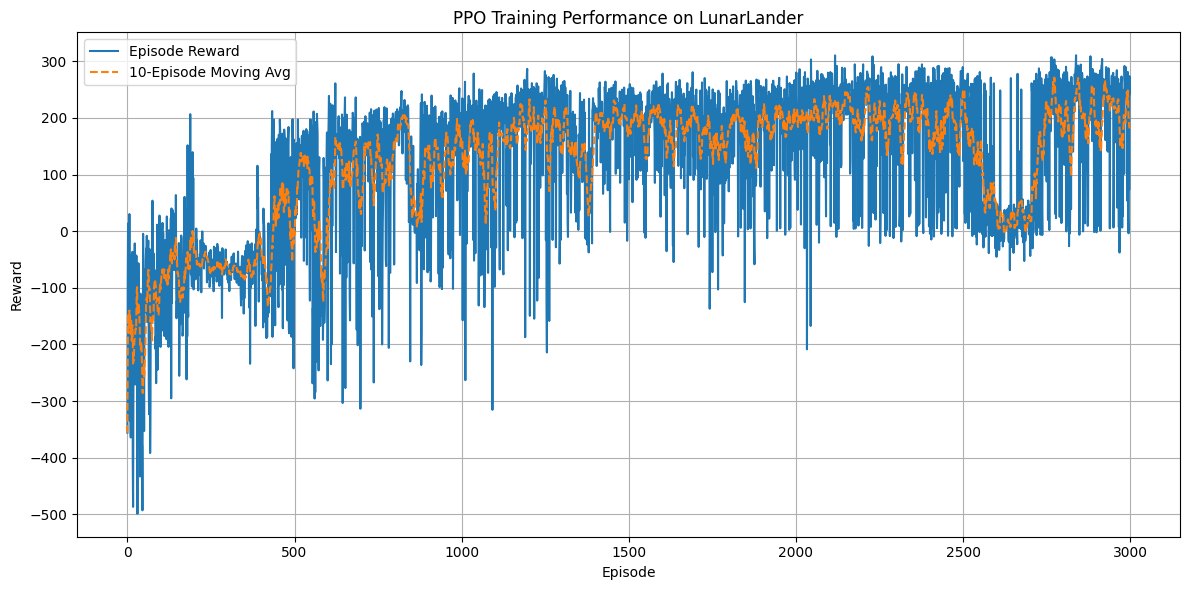

In [120]:
train()

In [121]:
run_test_agent_ppo(actor_path="best_actor.pth", episodes=1000)

✅ First success at episode 1

Tổng số lần hạ cánh thành công (reward >= 200): 729 / 1000
Nhiên liệu tiêu hao trung bình: 189.33 / episode
🎥 Ghi video cho episode thành công đầu tiên: 1
MoviePy - Building video d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4.
MoviePy - Writing video d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4



MoviePy - Done !
MoviePy - video ready d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4
🎬 Video lưu tại thư mục: d:\nam2\csttnt\Lunar_Lander\successful_videos


### Successful video

In [155]:
show_video(r'successful_videos\PPO\rl-video-episode-0.mp4')

### Failed video

In [156]:
show_video(r"failed_videos\PPO\Version3\failed_episode_1.mp4")

# Version 4.

## Lí do:
+ 1 số trường hợp Agent có xu hướng đi ra xa ngoài vùng đáp đất an toàn đãn đến việc đáp đất thất bại
+ 1 số trường hợp nhỏ thì lao xuống kha khá nhanh nên đãn đến việc Agent không kịp dùng động cơ để đưa nó trở lại vùng an toàn

## Giải pháp:
+ Thay đổi hàm điểm thưởng phạt với tốc độ lao khi quá nhanh
+ Khuyến khích Agent di chuyển vào tâm tránh bị thoát khỏi vùng an toàn

## Mong muốn:
+ Giải quyết được các trường hợp đã nói trên
+ Cải thiện hiệu suất.

In [122]:
import numpy as np

def shaped_reward_focus_survival_and_centering(original_reward, next_state):
    shaped_add = 0.0

    x_pos = next_state[0]
    y_pos = next_state[1]
    y_vel = next_state[3]
    angle = next_state[4]
    left_leg = next_state[6]
    right_leg = next_state[7]

    both_legs_on_ground = (left_leg > 0.5 and right_leg > 0.5)

    # Ngưỡng và hệ số (cần tinh chỉnh, nhưng bắt đầu với giá trị rõ ràng)
    CRITICAL_ANGLE_RAD = np.pi / 4  # 45 độ, rất nguy hiểm
    CRITICAL_Y_VEL_NEAR_GROUND = -0.8 # Rơi rất nhanh khi gần mặt đất
    NEAR_GROUND_Y_POS = 0.2

    SAFE_FLIGHT_Y_MIN = 0.3  # Độ cao tối thiểu để coi là "bay an toàn"
    SAFE_FLIGHT_Y_MAX = 0.8  # Độ cao tối đa để áp dụng thưởng hướng tâm
    CENTERING_X_TARGET_HALF_WIDTH = 0.15
    STABLE_FLIGHT_ANGLE_RAD = 0.1 # ~5.7 độ

    PENALTY_CRITICAL_ANGLE = -2.0  # Phạt nặng
    PENALTY_CRITICAL_Y_VEL = -2.0  # Phạt nặng
    REWARD_CENTERING_STABLE_FLIGHT = 0.1 # Thưởng vừa phải

    if not both_legs_on_ground: # Chỉ áp dụng khi đang bay
        # 1. Hình phạt cho các tình huống sắp rơi
        if abs(angle) > CRITICAL_ANGLE_RAD:
            shaped_add += PENALTY_CRITICAL_ANGLE

        if y_pos < NEAR_GROUND_Y_POS and y_vel < CRITICAL_Y_VEL_NEAR_GROUND:
            shaped_add += PENALTY_CRITICAL_Y_VEL

        # 2. Thưởng cho việc bay ổn định và hướng về tâm ở độ cao an toàn
        # Chỉ thưởng nếu KHÔNG rơi vào các hình phạt trên (để tránh mâu thuẫn)
        if not (abs(angle) > CRITICAL_ANGLE_RAD or \
                (y_pos < NEAR_GROUND_Y_POS and y_vel < CRITICAL_Y_VEL_NEAR_GROUND)):

            if SAFE_FLIGHT_Y_MIN < y_pos < SAFE_FLIGHT_Y_MAX:
                is_centering = abs(x_pos) < CENTERING_X_TARGET_HALF_WIDTH
                is_stable_angle = abs(angle) < STABLE_FLIGHT_ANGLE_RAD

                if is_centering and is_stable_angle:
                    shaped_add += REWARD_CENTERING_STABLE_FLIGHT
                # (Tùy chọn) Phạt nhẹ nếu ở vùng bay an toàn nhưng không hướng tâm hoặc không ổn định
                # else:
                #     if not is_centering:
                #         shaped_add -= 0.01 * abs(x_pos)
                #     if not is_stable_angle:
                #         shaped_add -= 0.02 * abs(angle)
    # Không thêm/bớt gì khi đã đáp, để phần thưởng gốc quyết định

    return original_reward + shaped_add

Episode 10 Average Reward: -262.40
✅ New best average reward: -262.40 - model saved!
Episode 20 Average Reward: -140.53
✅ New best average reward: -140.53 - model saved!
Episode 30 Average Reward: -115.99
✅ New best average reward: -115.99 - model saved!
Episode 40 Average Reward: -444.71
Episode 50 Average Reward: -150.32
Episode 60 Average Reward: -98.01
✅ New best average reward: -98.01 - model saved!
Episode 70 Average Reward: -318.16
Episode 80 Average Reward: -132.86
Episode 90 Average Reward: -162.85
Episode 100 Average Reward: -85.57
✅ New best average reward: -85.57 - model saved!
Episode 110 Average Reward: -46.29
✅ New best average reward: -46.29 - model saved!
Episode 120 Average Reward: -235.40
Episode 130 Average Reward: -47.74
Episode 140 Average Reward: -79.84
Episode 150 Average Reward: -31.21
✅ New best average reward: -31.21 - model saved!
Episode 160 Average Reward: -48.61
Episode 170 Average Reward: -45.75
Episode 180 Average Reward: -63.09
Episode 190 Average Rewa

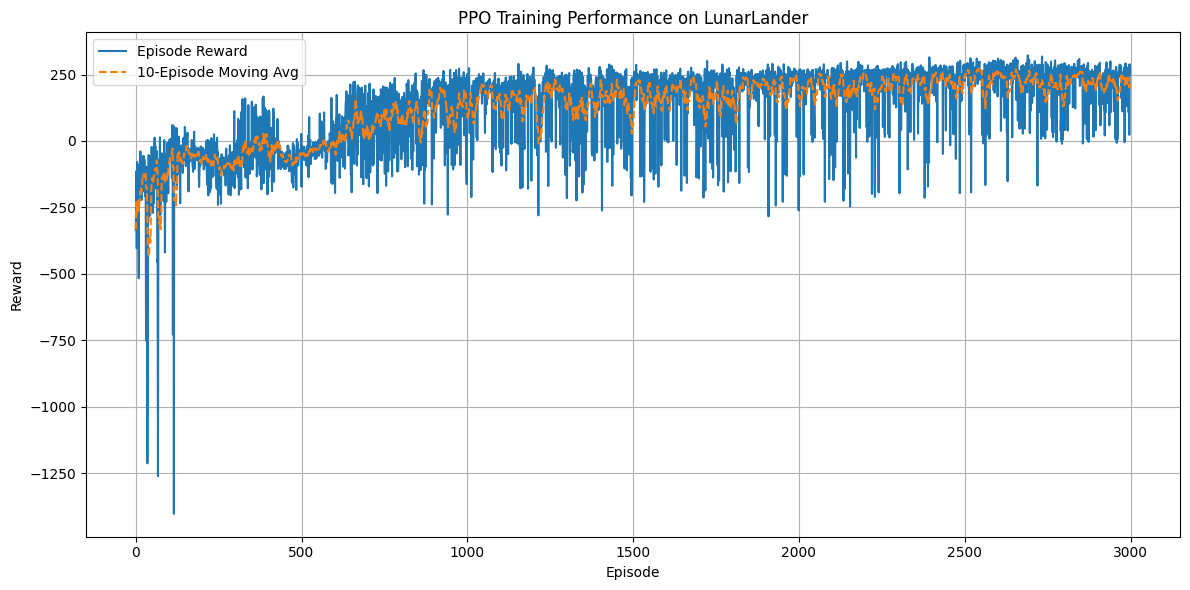

In [123]:
train()

In [126]:

run_test_agent_ppo(actor_path="best_actor.pth", episodes = 1000)

d:\nam2\csttnt\Lunar_Lander\ten_env\Lib\site-packages\gym\wrappers\record_video.py:75: UserWarning: WARN: Overwriting existing videos at d:\nam2\csttnt\Lunar_Lander\successful_videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


✅ First success at episode 1

Tổng số lần hạ cánh thành công (reward >= 200): 826 / 1000
Nhiên liệu tiêu hao trung bình: 158.26 / episode
🎥 Ghi video cho episode thành công đầu tiên: 1
MoviePy - Building video d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4.
MoviePy - Writing video d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4



MoviePy - Done !
MoviePy - video ready d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4
🎬 Video lưu tại thư mục: d:\nam2\csttnt\Lunar_Lander\successful_videos


In [158]:
test_fail_ppo(actor_path=r"D:\nam2\csttnt\Lunar_Lander\model\PPO\Version3\best_actor.pth", episodes = 10)


🚀 Đang chạy agent PPO từ D:\nam2\csttnt\Lunar_Lander\model\PPO\Version3\best_actor.pth để ghi lại các trường hợp thất bại...

❌ Episode 8 thất bại - Reward: 162.97 → lưu video: failed_videos\failed_episode_1.mp4
MoviePy - Building video failed_videos\failed_episode_1.mp4.
MoviePy - Writing video failed_videos\failed_episode_1.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_1.mp4
❌ Episode 10 thất bại - Reward: 12.62 → lưu video: failed_videos\failed_episode_2.mp4
MoviePy - Building video failed_videos\failed_episode_2.mp4.
MoviePy - Writing video failed_videos\failed_episode_2.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_2.mp4

📊 Tổng kết sau 10 episodes:
✅ Thành công: 8
❌ Thất bại: 2
⛽ Nhiên liệu tiêu hao trung bình: 107.9


### Successful video

In [157]:
show_video(r"successful_videos\PPO\4.mp4")

### Failed video

In [159]:
show_video(r"failed_videos\PPO\Version4\failed_episode_1.mp4")

# Version 5

## Lí do:
+ Dôi khi Agent vẫn lao ra ngoài vùng an toàn khiến cho Agent thất bại
+ Nhiên liệu tiêu hoa còn khá lớn

## Giải pháp:
+ Thay đổi tiếp tục lại hàm điểm thưởng

## Mong đợi:
+ Giải quyết được các vấn đề trên
+ Tiết kiệm nguyên liệu tiêu hao.

In [136]:
import numpy as np

def shaped_reward_safe_descent_focus(original_reward, next_state):
    shaped_add = 0.0  # Phần thưởng/phạt sẽ được cộng/trừ vào original_reward

    x_pos = next_state[0]
    y_pos = next_state[1]
    x_vel = next_state[2]
    y_vel = next_state[3]
    angle = next_state[4]
    angular_vel = next_state[5]
    left_leg_contact = next_state[6] > 0.5  # True nếu chạm
    right_leg_contact = next_state[7] > 0.5 # True nếu chạm

    both_legs_on_ground = left_leg_contact and right_leg_contact

    # --- Hằng số (CỰC KỲ QUAN TRỌNG: Cần được tinh chỉnh kỹ lưỡng qua thử nghiệm!) ---

    # 1. Ngưỡng và hình phạt cho các điều kiện thảm họa
    MAX_ABS_ANGLE_CRASH = np.pi / 3.5  # Khoảng 51 độ, rất nguy hiểm
    PENALTY_CRASH_ANGLE = -2.0        # Hình phạt nặng

    MAX_ABS_ANGULAR_VEL_CRASH = 1.2 # rad/s, xoay quá nhanh
    PENALTY_CRASH_ANGULAR_VEL = -1.5

    MAX_ABS_Y_VEL_IMPACT = -0.7     # Vận tốc dọc tối đa (âm) ngay trước khi va chạm mạnh
    IMPACT_Y_POS_THRESHOLD = 0.1    # Độ cao rất thấp để kiểm tra va chạm mạnh
    PENALTY_CRASH_Y_VEL_IMPACT = -2.5

    # 2. Kiểm soát tốc độ hạ cánh
    DESCENT_CONTROL_Y_POS_MAX = 0.9 # Bắt đầu kiểm soát từ độ cao này trở xuống
    DESCENT_CONTROL_Y_POS_MIN = IMPACT_Y_POS_THRESHOLD + 0.05 # Trên vùng va chạm một chút
                                                            # => Hành lang kiểm soát: [0.15, 0.9]

    IDEAL_DESCENT_Y_VEL_UPPER = -0.05 # Vận tốc hạ cánh "nhanh nhất" trong khoảng lý tưởng (gần lơ lửng)
    IDEAL_DESCENT_Y_VEL_LOWER = -0.35 # Vận tốc hạ cánh "chậm nhất" trong khoảng lý tưởng (vẫn đi xuống rõ ràng)
                                     # => Khoảng y_vel lý tưởng: [-0.35, -0.05]

    PENALTY_EXCESSIVE_Y_VEL_BASE = -0.5 # Hình phạt cơ sở khi rơi quá nhanh
    EXCESSIVE_Y_VEL_FACTOR = 1.5      # Hệ số nhân cho hình phạt rơi quá nhanh (tăng theo mức độ)
    REWARD_CONTROLLED_DESCENT = 0.15  # Thưởng khi tốc độ hạ cánh nằm trong khoảng lý tưởng

    # 3. Hướng dẫn đáp đúng cách (khi tốc độ hạ cánh đã ổn)
    APPROACH_STABILITY_Y_POS_MAX = DESCENT_CONTROL_Y_POS_MAX # Áp dụng trong cùng hành lang độ cao
    APPROACH_STABILITY_Y_POS_MIN = DESCENT_CONTROL_Y_POS_MIN

    CENTERING_X_TARGET_HALF_WIDTH = 0.12
    STABLE_ANGLE_RAD_APPROACH = 0.1  # ~5.7 độ
    STABLE_X_VEL_APPROACH = 0.15
    REWARD_GOOD_APPROACH = 0.2       # Thưởng khi tiếp cận tốt (vị trí, góc, vận tốc ngang)


    if not both_legs_on_ground: # Chỉ áp dụng hình phạt/thưởng khi đang bay
        # --- ƯU TIÊN 1: TRÁNH THẢM HỌA ---
        in_catastrophic_danger = False
        if abs(angle) > MAX_ABS_ANGLE_CRASH:
            shaped_add += PENALTY_CRASH_ANGLE
            in_catastrophic_danger = True
            # print(f"Angle Crash Penalty: angle={angle:.2f}")

        if abs(angular_vel) > MAX_ABS_ANGULAR_VEL_CRASH:
            shaped_add += PENALTY_CRASH_ANGULAR_VEL # Có thể cộng dồn với hình phạt góc
            in_catastrophic_danger = True
            # print(f"Angular Vel Crash Penalty: angular_vel={angular_vel:.2f}")

        if y_pos < IMPACT_Y_POS_THRESHOLD and y_vel < MAX_ABS_Y_VEL_IMPACT:
            shaped_add += PENALTY_CRASH_Y_VEL_IMPACT
            in_catastrophic_danger = True
            # print(f"Impact Crash Penalty: y_pos={y_pos:.2f}, y_vel={y_vel:.2f}")

        # Nếu không gặp nguy hiểm thảm khốc tức thời, mới xét đến các yếu tố khác
        if not in_catastrophic_danger:
            # --- ƯU TIÊN 2: KIỂM SOÁT TỐC ĐỘ HẠ CÁNH ---
            # Áp dụng trong "hành lang kiểm soát độ cao"
            if DESCENT_CONTROL_Y_POS_MIN < y_pos < DESCENT_CONTROL_Y_POS_MAX:
                is_descending_too_fast = y_vel < IDEAL_DESCENT_Y_VEL_LOWER
                is_descending_controlled = IDEAL_DESCENT_Y_VEL_LOWER <= y_vel <= IDEAL_DESCENT_Y_VEL_UPPER

                if is_descending_too_fast:
                    # Hình phạt tăng theo mức độ "quá nhanh"
                    excess_speed_magnitude = abs(y_vel) - abs(IDEAL_DESCENT_Y_VEL_LOWER)
                    shaped_add += PENALTY_EXCESSIVE_Y_VEL_BASE * (1 + excess_speed_magnitude * EXCESSIVE_Y_VEL_FACTOR)
                    # print(f"Excessive Y_Vel Penalty: y_vel={y_vel:.2f}, penalty_add={PENALTY_EXCESSIVE_Y_VEL_BASE * (1 + excess_speed_magnitude * EXCESSIVE_Y_VEL_FACTOR):.2f}")
                elif is_descending_controlled:
                    shaped_add += REWARD_CONTROLLED_DESCENT
                    # print(f"Controlled Descent Reward: y_vel={y_vel:.2f}")

                # --- ƯU TIÊN 3: HƯỚNG DẪN ĐÁP ĐÚNG CÁCH (NẾU TỐC ĐỘ HẠ CÁNH ĐÃ ỔN) ---
                # Chỉ thưởng nếu không rơi quá nhanh (tức là y_vel > IDEAL_DESCENT_Y_VEL_LOWER)
                # Điều này bao gồm cả trường hợp is_descending_controlled và trường hợp đang lơ lửng/bay lên nhẹ
                if y_vel > IDEAL_DESCENT_Y_VEL_LOWER: # Đảm bảo không rơi quá nhanh
                    # Áp dụng trong "hành lang tiếp cận ổn định" (giống hành lang kiểm soát ở đây)
                    if APPROACH_STABILITY_Y_POS_MIN < y_pos < APPROACH_STABILITY_Y_POS_MAX:
                        is_centering = abs(x_pos) < CENTERING_X_TARGET_HALF_WIDTH
                        is_stable_angle = abs(angle) < STABLE_ANGLE_RAD_APPROACH
                        is_stable_x_vel = abs(x_vel) < STABLE_X_VEL_APPROACH

                        if is_centering and is_stable_angle and is_stable_x_vel:
                            shaped_add += REWARD_GOOD_APPROACH
                            # print(f"Good Approach Reward: x_pos={x_pos:.2f}, angle={angle:.2f}, x_vel={x_vel:.2f}")
                        # (Không thêm hình phạt nhỏ ở đây để giữ logic đơn giản, tập trung vào thưởng khi tốt)
    # Kết thúc if not both_legs_on_ground

    return original_reward + shaped_add

Episode 10 Average Reward: -188.52
✅ New best average reward: -188.52 - model saved!
Episode 20 Average Reward: -218.91
Episode 30 Average Reward: -220.79
Episode 40 Average Reward: -142.51
✅ New best average reward: -142.51 - model saved!
Episode 50 Average Reward: -340.37
Episode 60 Average Reward: -272.69
Episode 70 Average Reward: -114.97
✅ New best average reward: -114.97 - model saved!
Episode 80 Average Reward: -193.00
Episode 90 Average Reward: -141.67
Episode 100 Average Reward: -81.55
✅ New best average reward: -81.55 - model saved!
Episode 110 Average Reward: -6.06
✅ New best average reward: -6.06 - model saved!
Episode 120 Average Reward: -98.38
Episode 130 Average Reward: -119.00
Episode 140 Average Reward: -117.81
Episode 150 Average Reward: -72.84
Episode 160 Average Reward: -117.79
Episode 170 Average Reward: -143.01
Episode 180 Average Reward: -106.50
Episode 190 Average Reward: -34.82
Episode 200 Average Reward: -73.07
Episode 210 Average Reward: -54.22
Episode 220 Av

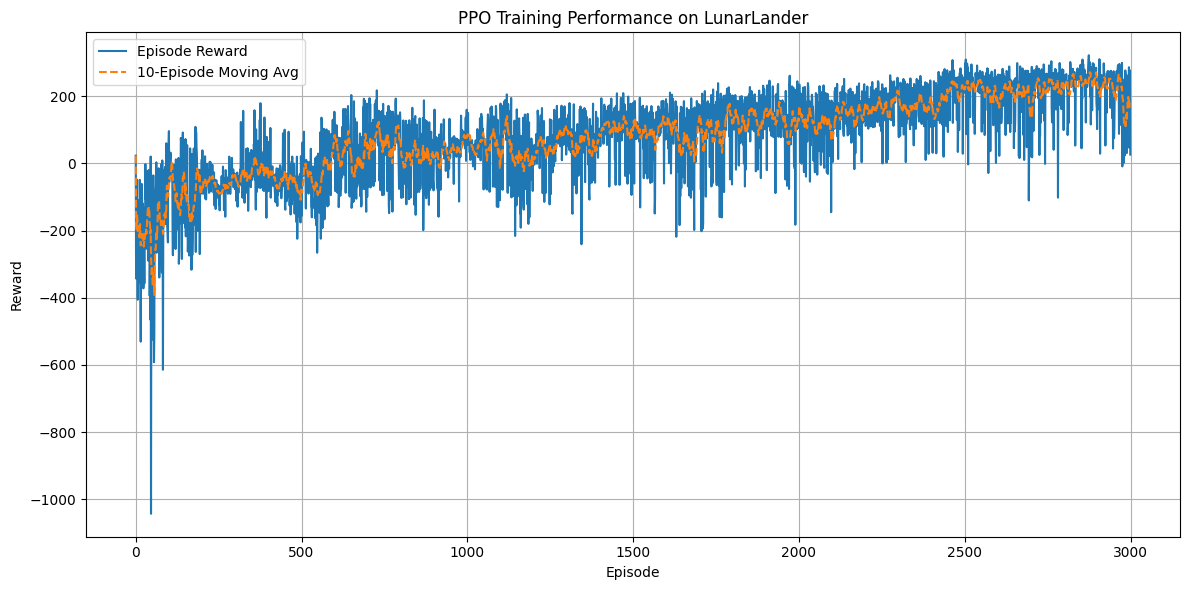

In [137]:
train()

In [140]:
run_test_agent_ppo(actor_path="best_actor.pth", episodes=1000)

✅ First success at episode 1

Tổng số lần hạ cánh thành công (reward >= 200): 836 / 1000
Nhiên liệu tiêu hao trung bình: 140.03 / episode
🎥 Ghi video cho episode thành công đầu tiên: 1
MoviePy - Building video d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4.
MoviePy - Writing video d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4



MoviePy - Done !
MoviePy - video ready d:\nam2\csttnt\Lunar_Lander\successful_videos\rl-video-episode-0.mp4
🎬 Video lưu tại thư mục: d:\nam2\csttnt\Lunar_Lander\successful_videos


In [160]:
test_fail_ppo(actor_path=r"D:\nam2\csttnt\Lunar_Lander\best_actor.pth", episodes = 10)


🚀 Đang chạy agent PPO từ D:\nam2\csttnt\Lunar_Lander\best_actor.pth để ghi lại các trường hợp thất bại...

❌ Episode 4 thất bại - Reward: 27.54 → lưu video: failed_videos\failed_episode_1.mp4
MoviePy - Building video failed_videos\failed_episode_1.mp4.
MoviePy - Writing video failed_videos\failed_episode_1.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_1.mp4
❌ Episode 8 thất bại - Reward: 162.05 → lưu video: failed_videos\failed_episode_2.mp4
MoviePy - Building video failed_videos\failed_episode_2.mp4.
MoviePy - Writing video failed_videos\failed_episode_2.mp4



MoviePy - Done !
MoviePy - video ready failed_videos\failed_episode_2.mp4

📊 Tổng kết sau 10 episodes:
✅ Thành công: 8
❌ Thất bại: 2
⛽ Nhiên liệu tiêu hao trung bình: 145.07


### Successful video

In [ ]:
show_video()

### Failed video

In [161]:
show_video(r"failed_videos\PPO\Version5\failed_episode_1.mp4")

# Kết luận.

## Theo như những gì đã thể hiện ở trên ta nhận thấy:

+ DQN và PPO là 1 trong những thuật toán khá tốt với Lunar Lander tuy nhiên chúng có 1 vài điểm khác biệt như:

    + Với DQN:
        + Sau khi tinh chỉnh tham số, thay đổi hàm điểm thưởng thì hiệu suất tăng lên khá đáng kể và đạt hiệt suất rất cao: 99.5% / 1000 episodes.
        + Đã khái quát được gần như tất cả các trường hợp trong lunar lander trừ 1 trường hợp là: 2 mép môi trường bị quá nghiêng khiến Agent trượt xuống.
        + Hiệu quả khi sử dụng nhiên liệu thì cao hơn PPO khoảng 30%
    
    + Với PPO:
        + Hiệu suất chưa tinh chỉnh khá thấp khoảng 36% nhưng sau khi tinh chỉnh hiệu suất đạt đáng kể khoảng 83.6% / 1000 episodes.
        + Chưa khái quát được các trường hợp phổ biến
        + Hiệu quả sủ dụng năng lượng rất ấn tượng
        + Thời gian đáp đất rẩt nhanh.

# Bài báo cáo trên còn nhiều thiếu xót nhất là đối với thuật toán PPO chưa thực sự được tối ưu hết mức.